# Statistics

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import urllib.request
import re
from re import sub

import pandas as pd
import math
import requests 
import json
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#plt.style.use(u'seaborn-paper')
plt.style.use('seaborn-white')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
plt.tick_params(labelsize=22)

import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV

from bs4 import BeautifulSoup
from requests import get
from pandas import DataFrame
from tabulate import tabulate

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

import itertools
from itertools import chain
from IPython.core.display import HTML

import matplotlib.pyplot as plt
from decimal import Decimal

from sklearn.model_selection import ShuffleSplit
import seaborn as sb
import dtale
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df = pd.read_csv("Endeligt data/df_final.csv")
df = df.drop(columns=['Time', 'ZipCity', 'PriceReduction', 'HasMultipleLevels', 'SquareMetrePrice', 'SquareMetrePrice_range', 'GeomaticAVMPricePerMetre', 'GeomaticAVMPricePerMetre_range', 'Quarter', 'Year', 'YearQuarter', 'Lokation', 'SaleDateMonth', 'SaleDateQuarter'])

#with pd.option_context('display.max_colwidth', -1): 
#    display(HTML(df.head(5).to_html()))

In [3]:
df.shape

(36183, 70)

In [4]:
dtale.show(df)

In [5]:
##################################################
#############           New          #############
##################################################

df['SquareMetrePrice'] = df.SalePrice / df.WeightedFloorArea
#bins = [0, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 75000, 200000]
#names = ['<15000','15000-20000','20000-25000','25000-30000', '30000-35000','35000-40000','40000-45000','45000-50000','50000-75000', '75000-100000']
#d = dict(enumerate(names,1))
#df['SquareMetrePrice_range'] = np.vectorize(d.get)(np.digitize(df['SquareMetrePrice'],bins))
#df['GeomaticAVMPricePerMetre'] = df.GeomaticAVMPrice / df.WeightedFloorArea
#df['GeomaticAVMPricePerMetre_range'] = np.vectorize(d.get)(np.digitize(df['GeomaticAVMPricePerMetre'],bins))

df['SaleDate'] = pd.to_datetime(df['SaleDate'],format='%Y-%m-%d', errors='coerce')
df['OfferingEnd'] = pd.to_datetime(df['OfferingEnd'],format='%Y-%m-%d', errors='coerce')
df['OfferingStart'] = pd.to_datetime(df['OfferingStart'],format='%Y-%m-%d', errors='coerce')
df['Quarter'] = df['SaleDate'].dt.quarter
df['Year'] = df['SaleDate'].dt.year
df['YearQuarter'] = df['Year'].map(str)+ 'Q' +df['Quarter'].map(str)
df['TurnoverTime'] = (df.OfferingEnd - df.OfferingStart)

df['PriceReduction'] = ((df.AskingPrice / df.SalePrice)-1)*100
df['HasMultipleLevels'] = df['Levels'].apply(lambda x: 1 if x > 1 else 0)

df['BuildAge'] = 2019 - df['YearBuilt']
df['RemodAfterBuild'] =  df['YearRemodAdd'] - df['YearBuilt']


### Inspect Salesprice 

In [6]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    #style.use('seaborn-white')
    plt.rcParams['font.size'] = 18

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df.loc[:,feature])
    #print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], 
               loc='best')

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot', size = 10)
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );


Skewness: 2.101459898702438
Kurtosis: 9.066212700028185


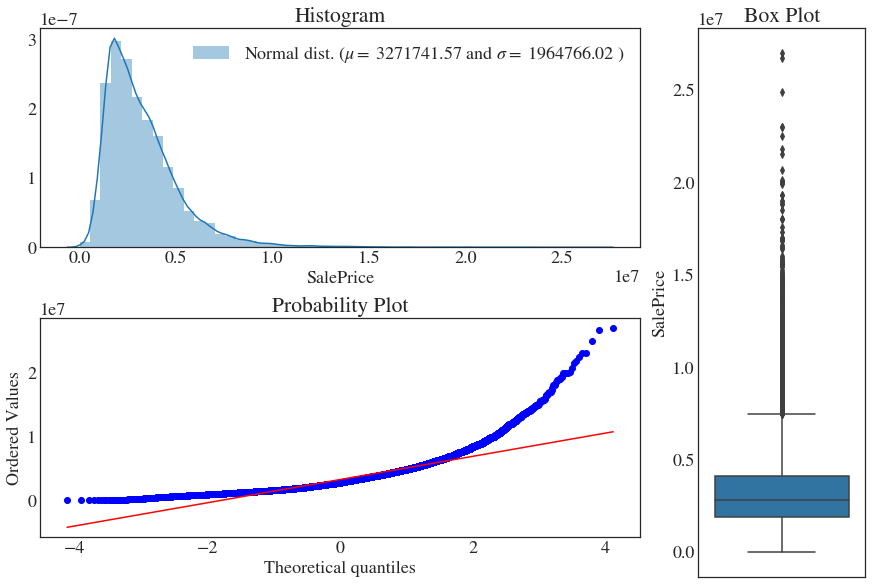

In [7]:
    
plotting_3_chart(df, 'SalePrice')

#skewness and kurtosis
print("Skewness: " + str(df['SalePrice'].skew()))
print("Kurtosis: " + str(df['SalePrice'].kurt()))

In [8]:
#df['SalePriceLog'] = np.log(df.SalePrice)

#print(len(df.loc[df['SalePriceLog'] <= 13]))
#df = df.loc[df['SalePriceLog'] > 13]

#plotting_3_chart(df, 'SalePriceLog')



In [9]:
WeightedFloorAreaBefore = df.WeightedFloorArea
SalePriceBefore = df.SalePrice

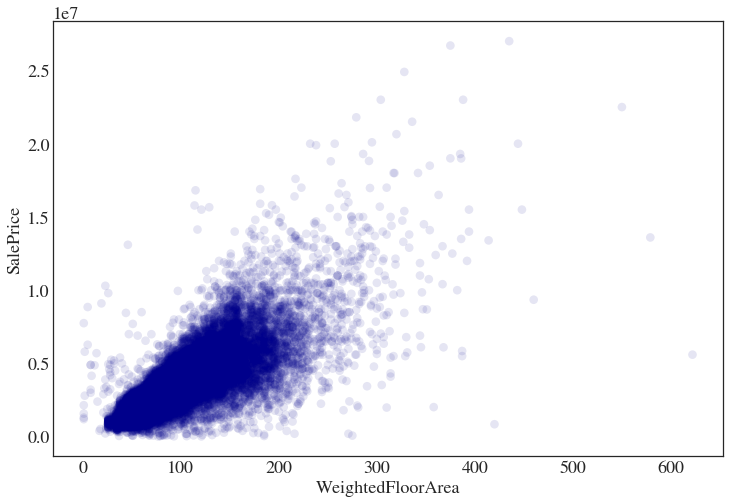

In [10]:
# Scatterplot before outliers are removed
plt.rcParams["figure.figsize"] = (12,8)
#plt.style.use('ggplot')

plt.scatter(df.WeightedFloorArea, df.SalePrice, 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75)
#plt.title('Scatterplot')
plt.rcParams['font.size'] = 18
plt.xlabel('WeightedFloorArea')
plt.ylabel('SalePrice')

#plt.suptitle('Categorical Plotting')
plt.show()

In [11]:
# Inspect possible outliers

with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df.loc[(df['WeightedFloorArea'] > 400) & (df['SalePrice'] < 15000000) ].to_html()))

In [12]:
df_new = df

In [13]:
########################################
############# ASSUMPTIONS  #############
########################################
df = df_new
print(df.shape)

# We limit SalesPrice to be in range(0.5 mio to 20 mio)
print(len(df[df.SalePrice > 20000000])) # 10
df = df[df.SalePrice < 20000000]
print(len(df[df.SalePrice < 500000])) # 115
df = df[df.SalePrice > 500000]

# We limit our area to min 10 m^2 and max 400
# No house under 10 m^2 (14)
print(len(df[df['WeightedFloorArea'] < 10]))
df = df.loc[df['WeightedFloorArea'] > 10]

# No house over 150 m^2 with no toilet (29)
print(len(df[(df['WeightedFloorArea'] > 150) & (df['Toilets'] == 0)]))
df = df.loc[~((df['WeightedFloorArea'] > 150) & (df['Toilets'] == 0.0)),:]

# Note that some houses have a WeightedFloorArea that is far from the TotalFloorArea
df['FloorDiff'] = abs(df.TotalFloorArea / df.WeightedFloorArea)

# TotalFloorArea > WeightedFloorArea (48)
print(len(df[(df['FloorDiff'] > 2)]))
df = df.loc[df['FloorDiff'] < 2]

# TotalFloorArea < WeightedFloorArea (30)
print(len(df[df['FloorDiff'] < 0.5]))
df = df.loc[df['FloorDiff'] > 0.5]

df = df.drop(columns=['FloorDiff'])

# Mean of SquareMetrePrice = 35354.26294080909
m = df.SquareMetrePrice.mean()

print(m*2)
# Remove houses with SquareMetrePrice 2 as high as mean (115)
print(len(df.loc[df['SquareMetrePrice'] > m*2]))
df = df.loc[df['SquareMetrePrice'] < m*2]

# Remove houses with SquareMetrePrice 6 times as low as mean (27)
print(m/4)
print(len(df.loc[df['SquareMetrePrice'] < m/4]))
df = df.loc[df['SquareMetrePrice'] > m/4]

# Remove ovious outliers 
out = df[(abs(df.AskingPrice / df.SalePrice) > 4) | (abs(df.AskingPrice / df.SalePrice) < 0.25)] # 34
print(len(out))
df = df.drop(out.index)
out[['Address','AskingPrice', 'SalePrice', 'GeomaticAVMPrice']]

#### ADDED 
#df = df.loc[df['SalePriceLog'] < 12]

print(df.shape)

################# Save data ##################
df.to_csv('Endeligt data/df_done.csv', index=False)


(36183, 78)
10
115
14
29
48
30
70888.30203392534
115
8861.037754240668
84
20
(35702, 78)


In [14]:
df.ZipCode

0        2450
1        2450
2        2450
3        2450
4        2450
5        2450
6        2450
7        2450
8        2450
9        2450
10       2450
11       2450
12       2450
13       2450
14       2450
15       2450
16       2450
17       2450
18       2450
19       2450
20       2450
21       2450
22       2450
23       2450
24       2450
25       2450
26       2450
27       2450
28       2450
29       2450
         ... 
36153    2100
36154    2100
36155    2700
36156    2300
36157    2300
36158    2300
36159    2300
36160    2300
36161    2300
36162    2300
36163    2300
36164    2300
36165    2300
36166    2300
36167    2300
36168    2300
36169    2300
36170    2300
36171    2300
36172    2300
36173    2300
36174    2300
36175    2300
36176    2300
36177    2300
36178    2300
36179    2300
36180    2300
36181    2300
36182    2300
Name: ZipCode, Length: 35702, dtype: int64


 mu = 14.85 and sigma = 0.54

Skewness: 0.021769166017049636
Kurtosis: -0.22788926906921603


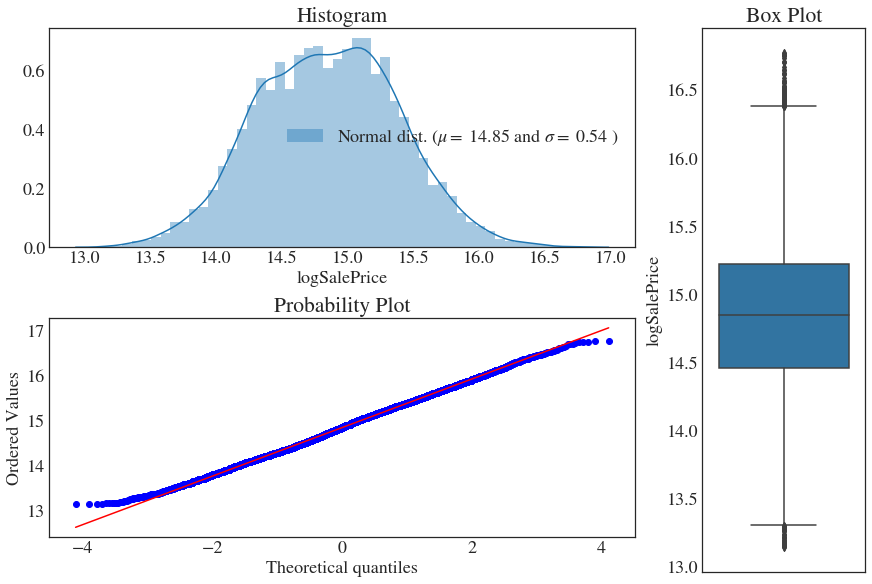

In [15]:
# For later use
df['logSalePrice'] = np.log(df.SalePrice)
plotting_3_chart(df, 'logSalePrice')

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['logSalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#skewness and kurtosis
print("Skewness: " + str(df['logSalePrice'].skew()))
print("Kurtosis: " + str(df['logSalePrice'].kurt()))

df = df.drop(columns=['logSalePrice'])

In [16]:
# After
WeightedFloorAreaAfter = df.WeightedFloorArea
SalePriceAfter = df.SalePrice

#WeightedFloorAreaBefore - df.WeightedFloorArea
SalePriceBefore.index.tolist() 
SalePriceAfter.index.tolist()

before = list(set(SalePriceBefore.index.tolist()) ^ set(SalePriceAfter.index.tolist()))
print(len(before))

OldObsSalePrice = SalePriceBefore.iloc[before]
OldObsWeightedFloorArea = WeightedFloorAreaBefore.iloc[before]

481


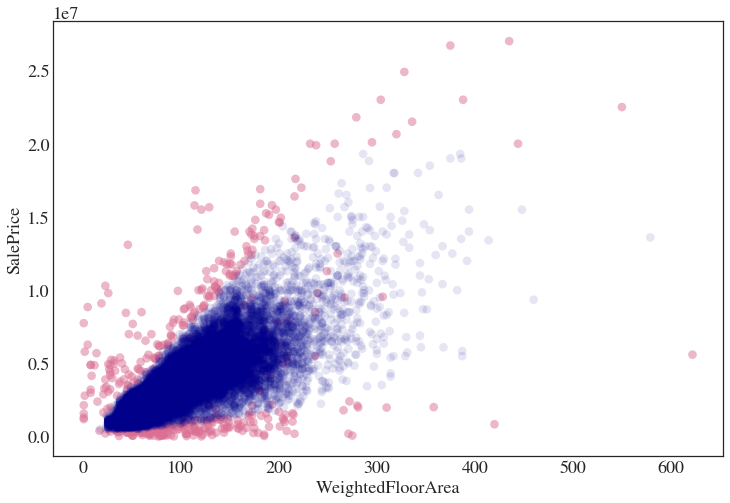

In [17]:
# Scatterplot after outliers are removed
plt.rcParams["figure.figsize"] = (12,8)
#plt.style.use('ggplot')

fig, ax = plt.subplots()

# Plot data
plt.scatter(OldObsWeightedFloorArea, OldObsSalePrice, 
            edgecolors='none', alpha=0.5, c ='palevioletred', s = 75);
plt.scatter(df.WeightedFloorArea, df.SalePrice, 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75);

# Change fontsize
#plt.rcParams['font.size'] = 18
plt.xlabel('WeightedFloorArea')
plt.ylabel('SalePrice')
plt.show()

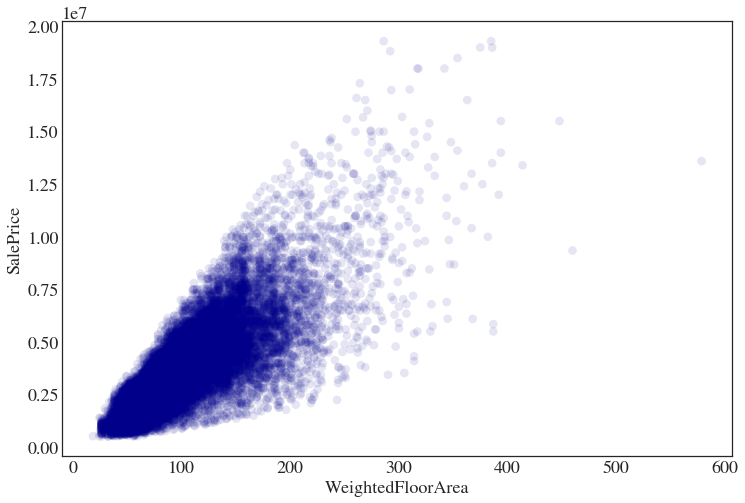

In [18]:
# Scatterplot after outliers are removed
plt.rcParams["figure.figsize"] = (12,8)
#plt.style.use('ggplot')

plt.scatter(df.WeightedFloorArea, df.SalePrice, 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75)
#plt.title('Scatterplot')
#plt.rcParams['font.size'] = 18
plt.xlabel('WeightedFloorArea')
plt.ylabel('SalePrice')

#plt.suptitle('Categorical Plotting')
plt.show()



 mu = 35378.98 and sigma = 10084.25

Skewness: 0.20515845998694704
Kurtosis: -0.08394151722577936


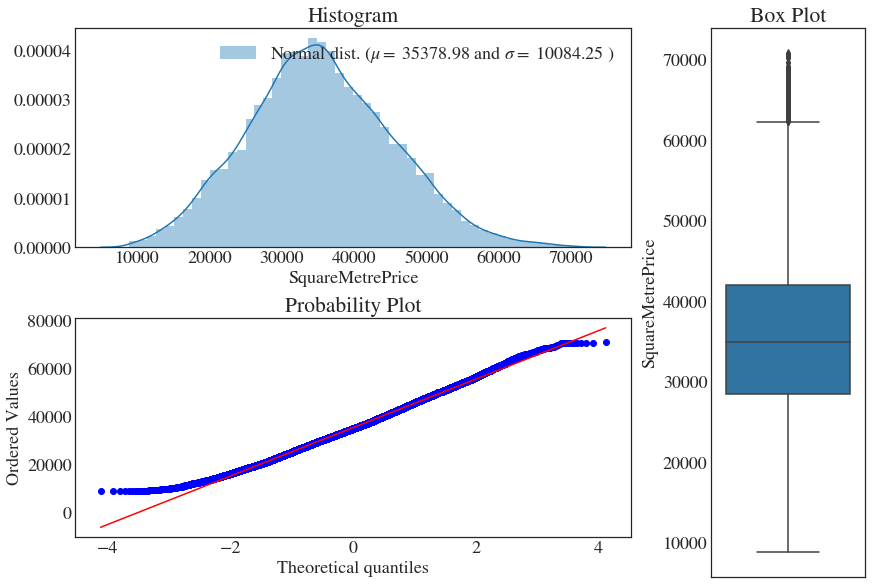

In [19]:
# 3 plots
plotting_3_chart(df, 'SquareMetrePrice')

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SquareMetrePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#skewness and kurtosis
print("Skewness: " + str(df['SquareMetrePrice'].skew()))
print("Kurtosis: " + str(df['SquareMetrePrice'].kurt()))

### Development over time

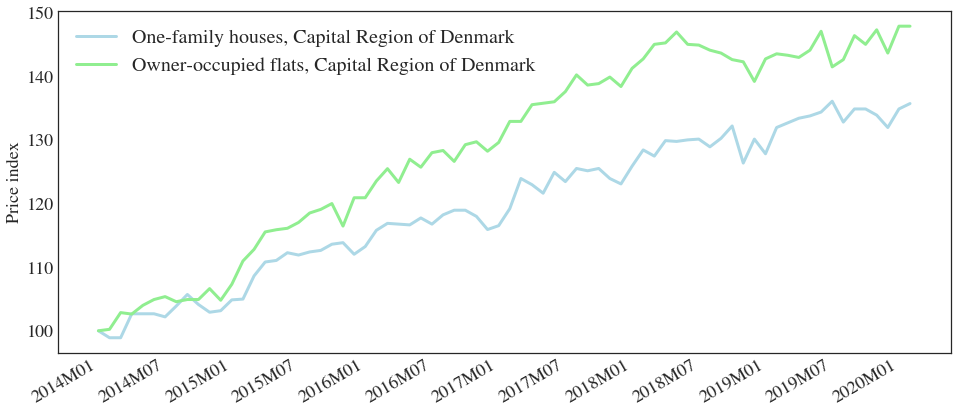

Executing shutdown due to inactivity...


2020-07-14 17:34:20,637 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-07-14 17:34:20,873 - INFO     - Executing shutdown...


In [23]:
EJ14 = pd.read_csv('Endeligt data/EJ14.csv',delimiter=';',header=1, skiprows=1)

EJ14.drop(EJ14.columns[[0, 1]], axis = 1, inplace = True)
EJ14 = EJ14.drop([0, 1, 4]).T
EJ14 = EJ14.rename(columns=EJ14.iloc[0]).drop(EJ14.index[0:1])

EJ14['YM'] = pd.date_range(start='01/2006', end='03/2020', freq='M')


EJ14['One-family houses, All of Denmark'] = EJ14['One-family houses'].iloc[:,0] * 100 / EJ14.loc['2014M01', ['One-family houses']][0:1].iloc[0]
EJ14['Owner-occupied flats, All of Denmark'] = EJ14['Owner-occupied flats, total'].iloc[:,0] * 100 / EJ14.loc['2014M01', ['Owner-occupied flats, total']][0:1].iloc[0]

EJ14['One-family houses, Capital Region of Denmark'] = EJ14['One-family houses'].iloc[:,1] * 100 / EJ14.loc['2014M01', ['One-family houses']][1:2].iloc[0]
EJ14['Owner-occupied flats, Capital Region of Denmark'] = EJ14['Owner-occupied flats, total'].iloc[:,1] * 100 / EJ14.loc['2014M01', ['Owner-occupied flats, total']][1:2].iloc[0]



EJ14 = EJ14.iloc[96:]

plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()

# Change index for PriceIndex
#HouseIndexZero = 100/ 80.7
#FlatIndexZero = 100/ 85.7
#PriceHouse = (EJ14.iloc[:, 2] * HouseIndexZero) /100
#PriceFlat = (EJ14.iloc[:, 3] * FlatIndexZero) /100

# Plot data
#plt.plot(EJ14.iloc[:, 0], c ='darkblue', linewidth=3, label='One-family houses, All of Denmark');
#plt.plot(EJ14.iloc[:, 1], c ='darkgreen', linewidth=3, label='Owner-occupied flats, All of Denmark');

plt.plot(EJ14['One-family houses, Capital Region of Denmark'], c ='lightblue', linewidth=3, label='One-family houses, Capital Region of Denmark');
plt.plot(EJ14['Owner-occupied flats, Capital Region of Denmark'], c ='lightgreen', linewidth=3, label='Owner-occupied flats, Capital Region of Denmark');


# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Price index')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%6 != 0:
        tick.label1.set_visible(False)

plt.show()

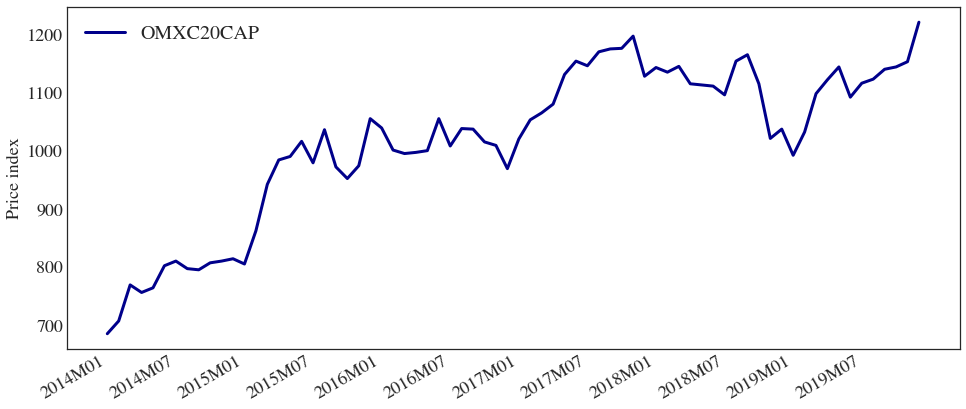

In [22]:
MPK13 = pd.read_csv('Endeligt data/MPK13-OMXC20CAP.csv',delimiter=';',header=0,skiprows=1)
MPK13 = MPK13.iloc[:,1:].T

plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()

# Plot data
plt.plot(MPK13[0], c ='darkblue', linewidth=3, label='OMXC20CAP');

# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Price index')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%6 != 0:
        tick.label1.set_visible(False)

plt.show()

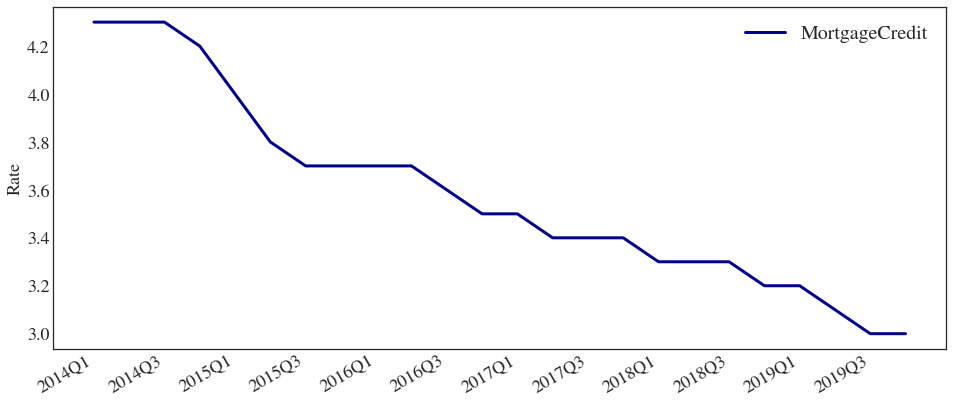

In [23]:
# Load Mortgage - note: 1 month delay manuelt
MPK18 = pd.read_csv('Endeligt data/MPK18-MortgageCredit.csv',delimiter=';',header=1,skiprows=1)
MPK18 = MPK18.iloc[0:,2:].T

plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()

# Plot data
plt.plot(MPK18[1], c ='darkblue', linewidth=3, label='MortgageCredit');

# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Rate')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)

plt.show()

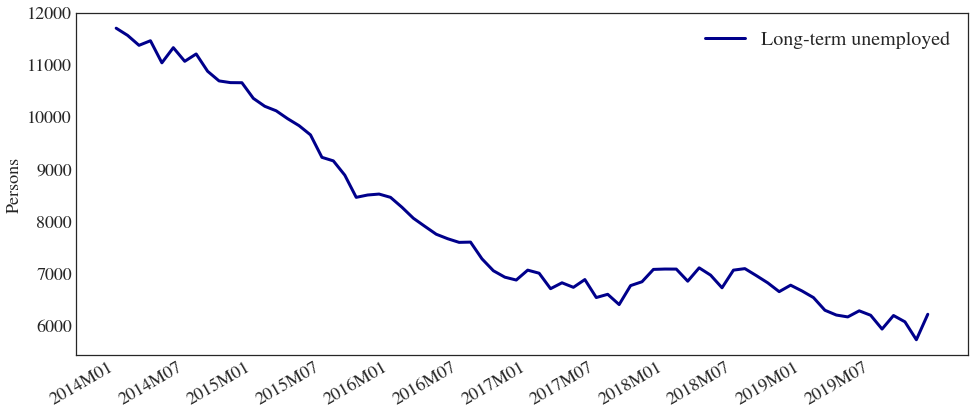

In [24]:
# Load Unemplotment - note: 1 month delay manuelt
AULK04 = pd.read_csv('Endeligt data/AULK04.csv',delimiter=';',header=0,skiprows=1)
AULK04 = AULK04.iloc[0:,1:].T


plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()

# Plot data
plt.plot(AULK04[0], c ='darkblue', linewidth=3, label='Long-term unemployed');

# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Persons')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%6 != 0:
        tick.label1.set_visible(False)

plt.show()

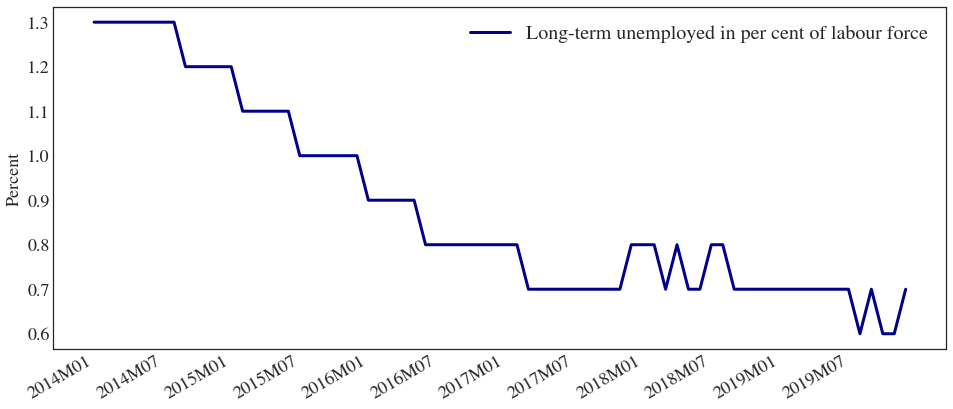

In [25]:
# Load Unemplotment - note: 1 month delay manuelt
AULK04 = pd.read_csv('Endeligt data/AULK04.csv',delimiter=';',header=0,skiprows=1)
AULK04 = AULK04.iloc[0:,1:].T


plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()

# Plot data
plt.plot(AULK04[1], c ='darkblue', linewidth=3, label='Long-term unemployed in per cent of labour force');

# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Percent')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%6 != 0:
        tick.label1.set_visible(False)

plt.show()

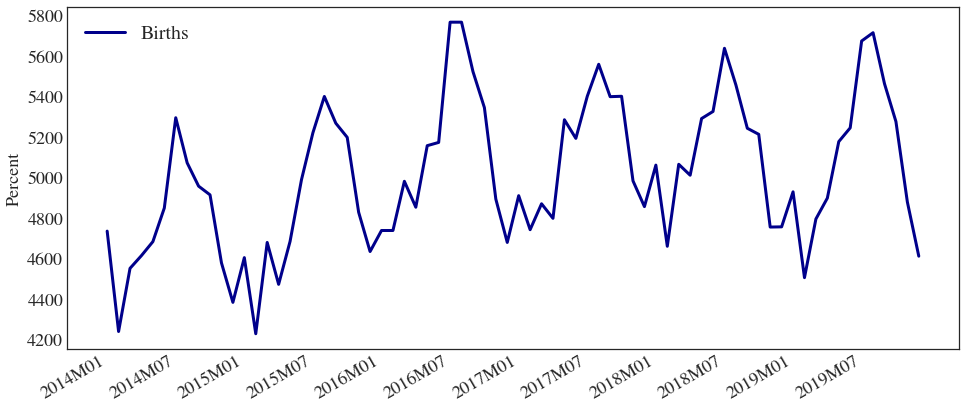

In [26]:


# Load Births - note: 1 month delay manuelt
FODDAG = pd.read_csv('Endeligt data/FODDAG.csv',delimiter=';',header=0,skiprows=1)
FODDAG = FODDAG.iloc[0:,1:].T


plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()

# Plot data
plt.plot(FODDAG[0], c ='darkblue', linewidth=3, label='Births');

# Change fontsize
plt.rcParams['font.size'] = 18

# Make a legend
fig.autofmt_xdate()

plt.ylabel('Percent')
plt.legend(fontsize=20)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%6 != 0:
        tick.label1.set_visible(False)

plt.show()

2019Q3    975.0
Name: YearQuarter, dtype: float64
2019Q4   NaN
Name: YearQuarter, dtype: float64


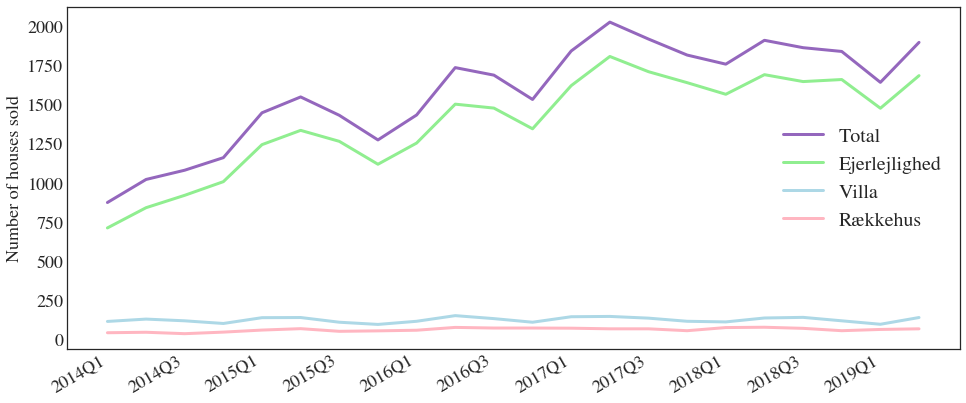

In [27]:
sold_per_quater = df.YearQuarter.value_counts()
sold_per_quater = sold_per_quater.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

print((sold_per_quater[sold_per_quater.index == '2019Q3']))
print((sold_per_quater[sold_per_quater.index == '2019Q4']))

sold_per_quater = (sold_per_quater[sold_per_quater.index != '2019Q4'])
sold_per_quater = (sold_per_quater[sold_per_quater.index != '2019Q3'])



Ejerlejlighed = df[df.Type == 'Ejerlejlighed'].YearQuarter.value_counts()
Rækkehus = df[df.Type == 'Rækkehus'].YearQuarter.value_counts()
Villa = df[df.Type == 'Villa'].YearQuarter.value_counts()

Ejerlejlighed = Ejerlejlighed.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

Rækkehus = Rækkehus.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

Villa = Villa.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

Ejerlejlighed = (Ejerlejlighed[Ejerlejlighed.index != '2019Q4'])
Ejerlejlighed = (Ejerlejlighed[Ejerlejlighed.index != '2019Q3'])

Rækkehus = (Rækkehus[Rækkehus.index != '2019Q4'])
Rækkehus = (Rækkehus[Rækkehus.index != '2019Q3'])

Villa = (Villa[Villa.index != '2019Q4'])
Villa = (Villa[Villa.index != '2019Q3'])




plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()


# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')

# Plot data
plt.plot(sold_per_quater, c ='tab:purple', linewidth=3, label='Total');
plt.plot(Ejerlejlighed, c ='lightgreen', linewidth=3, label='Ejerlejlighed');
plt.plot(Villa, c ='lightblue', linewidth=3, label='Villa');
plt.plot(Rækkehus, c ='lightpink', linewidth=3, label='Rækkehus');
# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.legend(fontsize=14)
# Make a legend
fig.autofmt_xdate()
plt.ylabel('Number of houses sold')
plt.legend(fontsize=20)


xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)

plt.show()


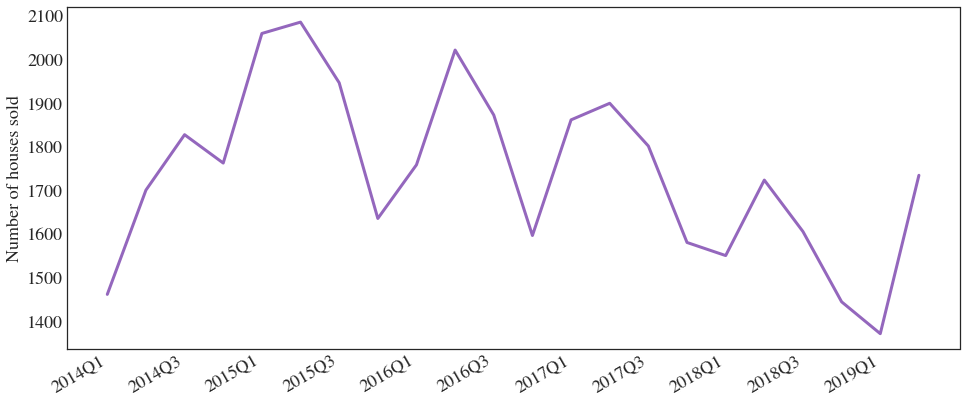

In [28]:
############### SALG JF FINANSDANMARK ###############

FinansDk = pd.read_excel(r'/Users/joje/Desktop/Speciale/Endeligt data/Boligmarkedsstatistikken_SolgteBoliger.xlsx', 
                         sheet_name='Ark1', skiprows=0)

FinansDk = FinansDk.T



plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()


# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')

plt.ylabel('Number of houses sold')
plt.plot(FinansDk[0], c ='tab:purple', linewidth=3);

fig.autofmt_xdate()
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)

plt.show()

In [29]:
QuarterM2 = np.round(df.groupby('YearQuarter', as_index=False).agg({"SquareMetrePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
QuarterM2

YearQuarter SquareMetrePrice                                          \
                          count      mean       std    median       min   
0       2014Q1              875  27830.65   7424.49  27696.63  10242.31   
1       2014Q2             1022  29358.47   7982.26  28979.99   8898.31   
2       2014Q3             1081  28984.97   7943.82  28703.70   9380.63   
3       2014Q4             1161  28872.34   7640.81  28550.72   9562.50   
4       2015Q1             1447  30900.29   8384.40  30274.65   9398.50   
5       2015Q2             1548  32377.10   8892.03  31925.10   9645.39   
6       2015Q3             1431  32834.22   8739.44  32417.58   9524.82   
7       2015Q4             1274  32423.74   8954.43  31344.00   9554.26   
8       2016Q1             1433  33670.88   8823.49  32888.89   8967.39   
9       2016Q2             1735  34930.76   8781.51  34201.75   9632.35   
10      2016Q3             1687  35350.63   8984.43  34591.84   9000.00   
11      2016Q4             1532  35178.49   9552.72  34632.37   8876.92   
12      2017Q1             1841  36408.97   9256.29  35932.58   8928.57   
13      2017Q2             2025  37451.46   9730.35  37234.04   9558.82   
14      2017Q3             1917  38240.00  10078.06  37803.03   9056.12   
15      2017Q4             1815  37547.04  10554.37  37128.71   9791.67   
16      2018Q1             1757  39110.17  10409.50  38750.00   9066.67   
17      2018Q2             1909  39360.78  10189.88  39204.55   9913.79   
18      2018Q3             1862  38073.34  10542.95  37623.71   9455.36   
19      2018Q4             1838  36841.66  10743.56  37087.12   9490.91   
20      2019Q1             1641  38725.59  10377.52  38571.43   9117.65   
21      2019Q2             1896  38073.16  10142.50  37627.26   8956.61   
22      2019Q3              975  36777.43  10681.83  36776.32   8921.88   

              
         max  
0   57327.59  
1   63356.16  
2   70454.55  
3   56081.08  
4   68846.15  
5   70618.27  
6   66949.15  
7   63779.53  
8   70670.73  
9   70578.49  
10  70886.52  
11  70707.07  
12  70414.20  
13  70408.16  
14  70398.77  
15  68000.00  
16  70385.00  
17  69767.44  
18  68439.72  
19  68931.03  
20  69222.22  
21  68855.93  
22  70689.66

2020-07-07 11:37:23,830 - WARNING  - No handles with labels found to put in legend.


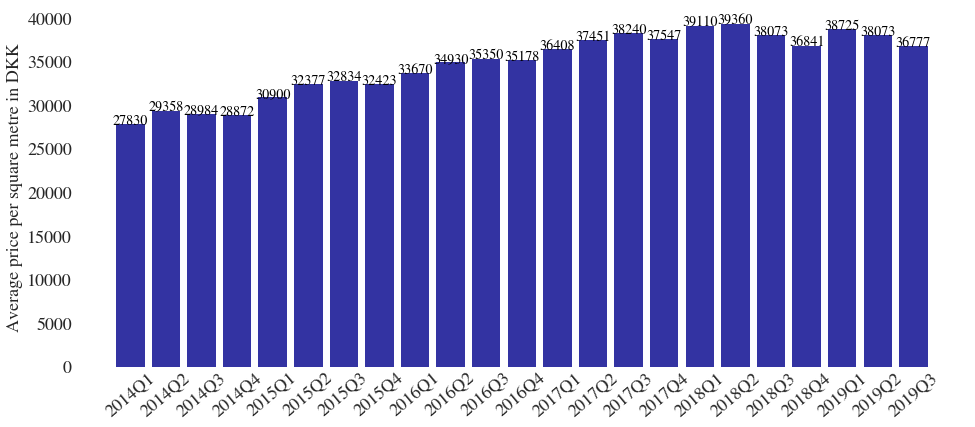

In [30]:
plt.figure(figsize=(16,10))
opacity = 0.8

# Plot the data
data_line = plt.bar(QuarterM2['YearQuarter'], QuarterM2['SquareMetrePrice']['mean'], color='darkblue', alpha=opacity)

# Change fontsize
plt.rcParams['font.size'] = 20

# Make a legend
plt.legend()
plt.xticks(rotation = 40)

#
plt.subplots_adjust(bottom= 0.6, top = 1.1)

#plt.title('Average price per m2 in different areas of Copenhagen', fontsize=16)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove all the ticks and directly label each bar with respective value
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.ylabel('Average price per square metre in DKK')

# direct label each bar with Y axis values
for bari in data_line:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=14)
    
#plt.savefig("Averagepricem2cph.png", bbox_inches="tight")
#plt.show()

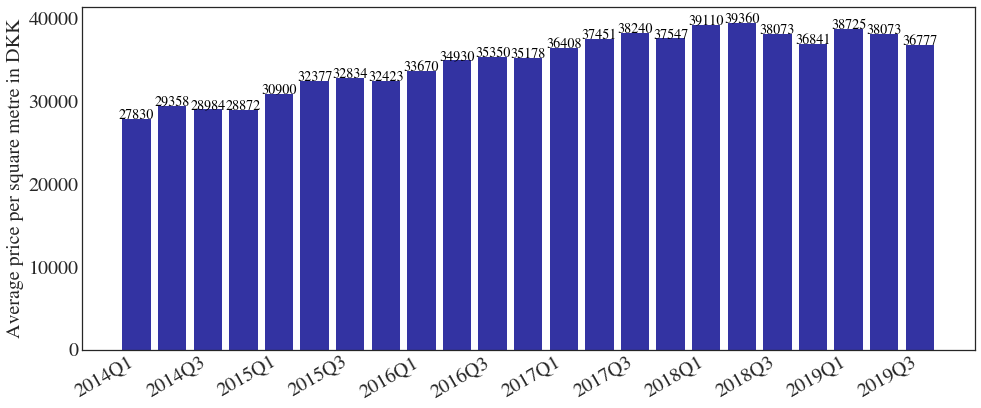

In [31]:

plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()


# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.xticks(rotation=45, horizontalalignment='right')

plt.bar(QuarterM2['YearQuarter'], QuarterM2['SquareMetrePrice']['mean'], color='darkblue', alpha=opacity)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.ylabel('Average price per square metre in DKK')

fig.autofmt_xdate()
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)
        
# direct label each bar with Y axis values
for bari in data_line:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=14)
    
plt.show()

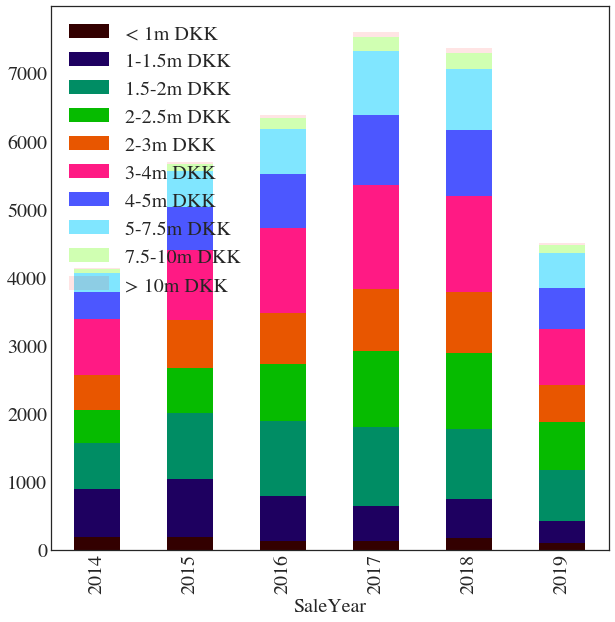

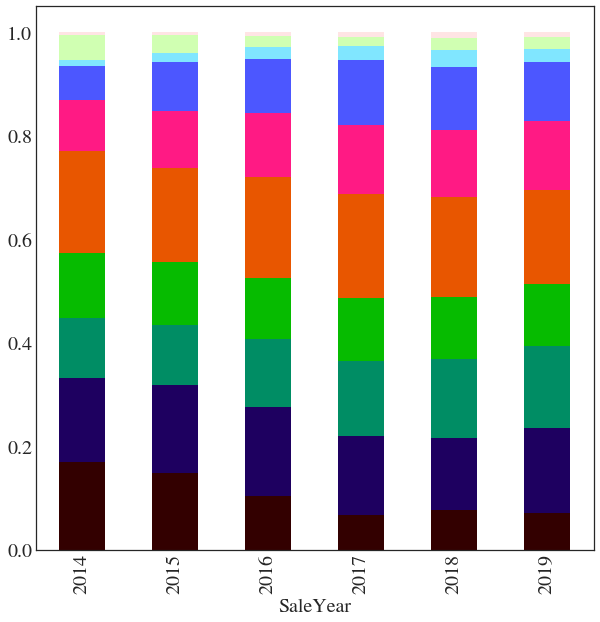

In [141]:
# Sold houses by price range
from matplotlib.colors import ListedColormap

def generate_colormap(N):
    arr = np.arange(N)/N
    N_up = int(math.ceil(N/7)*7)
    arr.resize(N_up)
    arr = arr.reshape(7,N_up//7).T.reshape(-1)
    ret = matplotlib.cm.hsv(arr)
    n = ret[:,3].size
    a = n//2
    b = n-a
    for i in range(3):
        ret[0:n//2,i] *= np.arange(0.2,1,0.8/a)
    ret[n//2:,3] *= np.arange(1,0.1,-0.9/b)
#     print(ret)
    return ret

#plt.get_cmap('Paired')


bins=[0,1000000,1500000,2000000,2500000,3000000,4000000,5000000,7500000, 10000000,50000000]
choices =['< 1m DKK','1-1.5m DKK','1.5-2m DKK','2-2.5m DKK','2-3m DKK','3-4m DKK','4-5m DKK','5-7.5m DKK','7.5-10m DKK','> 10m DKK']
df['SalePriceRange']=pd.cut(df['SalePrice'],bins=bins,labels=choices)

df['SaleDate'] = pd.to_datetime(df['SaleDate'], format='%Y-%m-%d', errors='coerce')
df['SaleYear'] = df['SaleDate'].dt.year

data_crosstab = pd.crosstab(df.SalePriceRange, df.SaleYear, margins = True) 

#print(data_crosstab.to_latex())
#print(data_crosstab)

plt.rcParams["figure.figsize"] = (10,10)
HouseAbs = df.groupby(['SaleYear', 'SalePriceRange']).size().reset_index().pivot(columns='SalePriceRange', index='SaleYear', values=0)
HouseAbs.plot(kind='bar', stacked=True, cmap=ListedColormap(generate_colormap(100*3)))
# Change fontsize
#plt.rcParams['font.size'] = 12
plt.legend(fontsize=20)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
HouseProcent = df.groupby("SaleYear")['SalePriceRange'].value_counts(normalize=True).unstack()
HouseProcent.plot(kind='bar', stacked=True, cmap=ListedColormap(generate_colormap(100*3)), legend=None)
# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.legend(fontsize=18)

plt.show()


In [139]:
HouseProcent

SalePriceRange  1-1.5m DKK  1.5-2m DKK  2-2.5m DKK  2-3m DKK  3-4m DKK  \
SaleYear                                                                 
2014              0.169848    0.161633    0.116212  0.125393  0.197149   
2015              0.149123    0.169298    0.115614  0.122632  0.181579   
2016              0.103961    0.173164    0.130578  0.117113  0.194771   
2017              0.067649    0.152014    0.145696  0.121084  0.200316   
2018              0.076704    0.140375    0.151914  0.119875  0.193185   
2019              0.072030    0.164007    0.157801  0.120567  0.181516   

SalePriceRange  4-5m DKK  5-7.5m DKK  7.5-10m DKK  < 1m DKK  > 10m DKK  
SaleYear                                                                
2014            0.098575    0.066924     0.011597  0.047838   0.004832  
2015            0.110526    0.093333     0.017368  0.034561   0.005965  
2016            0.123845    0.104587     0.023955  0.020197   0.007828  
2017            0.135167    0.124506     0.026454  0.018294   0.008818  
2018            0.130057    0.121368     0.032175  0.024301   0.010046  
2019            0.132092    0.115470     0.024379  0.023493   0.008644

In [63]:
# Houes > 4 millions
print(HouseProcent.iloc[0:1][['4-5m DKK','5-7.5m DKK','7.5-10m DKK','> 10m DKK']].sum(axis=1))
print(HouseProcent.iloc[4:5][['4-5m DKK','5-7.5m DKK','7.5-10m DKK','> 10m DKK']].sum(axis=1))


# Houes \in (1.5-4) millions
print(HouseProcent.iloc[0:1][['1.5-2m DKK','2-2.5m DKK','2-3m DKK','3-4m DKK']].sum(axis=1))
print(HouseProcent.iloc[4:5][['1.5-2m DKK','2-2.5m DKK','2-3m DKK','3-4m DKK']].sum(axis=1))


# Houes < 1.5 million
print(HouseProcent.iloc[0:1][['< 1m DKK','1-1.5m DKK']].sum(axis=1))
print(HouseProcent.iloc[4:5][['< 1m DKK','1-1.5m DKK']].sum(axis=1))

SaleYear
2014    0.181928
dtype: float64
SaleYear
2018    0.293646
dtype: float64
SaleYear
2014    0.600387
dtype: float64
SaleYear
2018    0.605349
dtype: float64
SaleYear
2014    0.217685
dtype: float64
SaleYear
2018    0.101005
dtype: float64


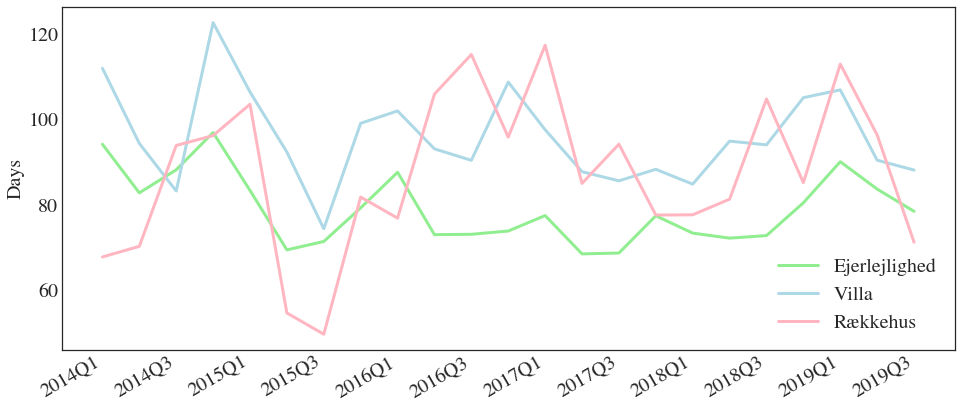

In [142]:
df['DaysTurnoverTime'] = df.TurnoverTime.dt.days

#QuarterType = np.round(df.groupby(['Type', 'YearQuarter'], as_index=False).agg({"DaysTurnoverTime": ['count', 'mean','std', 'median', 'min', 'max']}),2)
QuarterType = np.round(df.groupby(['Type', 'YearQuarter'], as_index=False).agg({"DaysTurnoverTime": ['mean']}),2)


Ejerlejlighed = QuarterType[QuarterType.Type == 'Ejerlejlighed']
Rækkehus = QuarterType[QuarterType.Type == 'Rækkehus']
Villa = QuarterType[QuarterType.Type == 'Villa']

plt.rcParams["figure.figsize"] = (16,7)
#plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.plot(Ejerlejlighed.YearQuarter,Ejerlejlighed.DaysTurnoverTime, c='lightgreen', label='Ejerlejlighed', linewidth=3)
ax.plot(Villa.YearQuarter,Villa.DaysTurnoverTime, c='lightblue', label='Villa', linewidth=3)
plt.plot(Rækkehus.YearQuarter,Rækkehus.DaysTurnoverTime, c ='lightpink', label='Rækkehus', linewidth=3);

#plt.xticks(rotation=45, horizontalalignment='right')
fig.autofmt_xdate()
plt.legend(fontsize=20)
plt.ylabel('Days')
#plt.rcParams['font.size'] = 12
#plt.legend(fontsize=14)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)
plt.show()


### Development across cities

In [148]:
df.SalePrice.mean()

3251839.5743375723

In [147]:
pd.options.display.float_format = '{:.0f}'.format

GroupCity = np.round(df.groupby('City', as_index=False).agg({"SalePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
column_names = ['group', 'N', 'mean', 'std', 'median', 'min', 'max']
GroupCity.columns = column_names 
GroupCity = GroupCity.set_index('group')

print(GroupCity.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     N &    mean &     std &  median &     min &      max \\
group           &       &         &         &         &         &          \\
\midrule
Brønshøj        &  1820 & 2925203 & 1460054 & 2800000 &  525000 &  8575000 \\
Frederiksberg   &  3911 & 3512576 & 1956021 & 2995000 &  640000 & 16000000 \\
Frederiksberg C &  1771 & 4603899 & 2209230 & 4300000 &  646000 & 19000000 \\
København K     &  2547 & 4296880 & 2251339 & 3825000 &  518500 & 19300000 \\
København N     &  2576 & 2472626 & 1161265 & 2222500 &  510000 & 10850000 \\
København NV    &  1880 & 2233801 & 1238042 & 1825000 &  590000 &  8700000 \\
København S     &  8060 & 2962826 & 1528981 & 2680000 &  515000 & 12995000 \\
København SV    &  1398 & 2842330 & 1342332 & 2745000 &  546873 & 12100000 \\
København V     &  1920 & 3725310 & 1771823 & 3500000 &  550000 & 13525000 \\
København Ø     &  4496 & 3740609 & 2182382 & 3100000 &  575000 & 19300000 \\
Nordhavn        &   329 & 5387531 

In [26]:
GroupCityMean = df.groupby('City').mean()
PricePerSquareMetreMean = np.mean(df['SquareMetrePrice'])

print(PricePerSquareMetreMean)

35378.979478577305


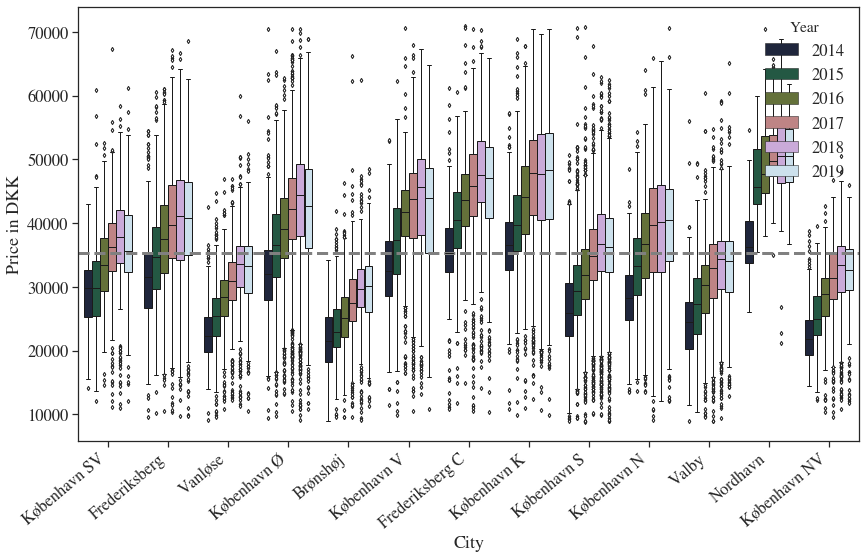

In [27]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

flierprops = dict(markerfacecolor='1', markersize=3,
              linestyle='none')


# Change size
plt.rcParams["figure.figsize"] = (14,8)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)

#plt.style.use('ggplot')
plt.xticks(rotation=40, horizontalalignment='right')
sns.boxplot(y='SquareMetrePrice', x='City', 
            data=df, 
            palette="cubehelix",
            hue='Year', linewidth=1,flierprops=flierprops );
plt.axhline(PricePerSquareMetreMean, label='Average square metre price in Copenhagen', linestyle='--', color='gray', linewidth=3.0)
plt.ylabel('Price in DKK')
#plt.legend(fontsize=18)


plt.show()

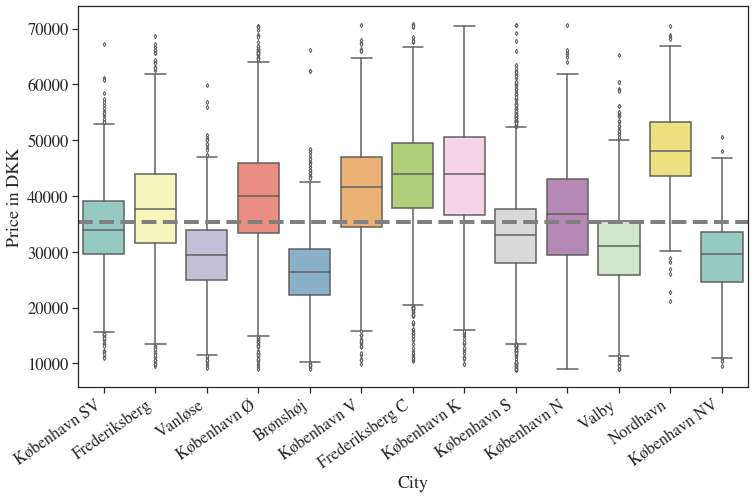

In [28]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Change size
plt.rcParams["figure.figsize"] = (12,7)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
#plt.style.use('ggplot')

sns.boxplot(x="City", y="SquareMetrePrice", data=df, palette="Set3", flierprops=flierprops)
plt.axhline(PricePerSquareMetreMean, label='Average square metre price in Copenhagen', linestyle='--', color='gray', linewidth=4.0)
plt.xticks(rotation=35, horizontalalignment='right')
plt.ylabel('Price in DKK')
plt.show()

In [29]:
df.WeightedFloorArea.mean()

91.0841409444849

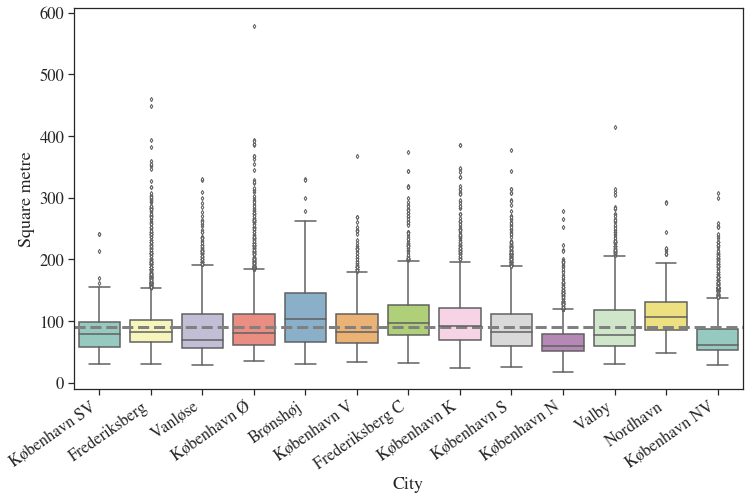

In [30]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Change size
plt.rcParams["figure.figsize"] = (12,7)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
#plt.style.use('ggplot')

sns.boxplot(x="City", y="WeightedFloorArea", data=df, palette="Set3", flierprops=flierprops)
plt.axhline(df.WeightedFloorArea.mean(), label='Average square metre in Copenhagen', linestyle='--', color='gray', linewidth=3.0)
plt.xticks(rotation=35, horizontalalignment='right')
plt.ylabel('Square metre')
plt.show()

In [31]:
GroupType = np.round(df.groupby('Type', as_index=False).agg({"WeightedFloorArea": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupType


#print(GroupType.to_latex())

Type WeightedFloorArea                                   
                             count    mean    std median   min    max
0  Ejerlejlighed             31407   82.29  33.73   74.0  18.0  392.0
1       Rækkehus              1441  139.63  37.21  134.0  74.0  394.0
2          Villa              2854  163.30  47.60  157.0  49.0  579.0

In [217]:
GroupType = np.round(df.groupby('City', as_index=False).agg({"WeightedFloorArea": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupType


#print(GroupType.to_latex())

City WeightedFloorArea                        
                                count mean std median min max
0          Brønshøj              1820  110  49    104  31 331
1     Frederiksberg              3911   92  43     83  31 460
2   Frederiksberg C              1771  107  44     97  32 375
3       København K              2547  100  47     92  24 386
4       København N              2576   68  26     60  18 278
5      København NV              1880   78  41     62  29 307
6       København S              8060   89  38     82  26 377
7      København SV              1398   81  26     79  31 242
8       København V              1920   92  38     83  34 367
9       København Ø              4496   94  47     81  36 579
10         Nordhavn               329  110  37    107  48 293
11            Valby              2992   93  45     77  30 414
12          Vanløse              2002   90  47     70  28 330

In [160]:
GroupCityType = np.round(df.groupby(['City', 'Type']).agg({"SquareMetrePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupCityType

SquareMetrePrice                               
                                         count  mean   std median   min   max
City            Type                                                         
Brønshøj        Ejerlejlighed              898 25311  5912  25517  9016 66207
                Rækkehus                   152 28077  6166  26947  9645 45250
                Villa                      770 27566  7133  27419  9589 62500
Frederiksberg   Ejerlejlighed             3665 37397  9241  37500  9562 67204
                Rækkehus                    88 45952  9313  46600 24324 68624
                Villa                      158 40418 10305  40192 10638 66176
Frederiksberg C Ejerlejlighed             1749 42952  9748  43902 10425 70887
                Villa                       22 51032 10750  54301 32092 68528
København K     Ejerlejlighed             2452 43391 10702  44185  9894 70513
                Rækkehus                    92 39343  9646  36618 16017 67857
                Villa                        3 56586  4750  54545 53198 62016
København N     Ejerlejlighed             2575 36246  9984  36842  9056 70690
                Villa                        1 36057   nan  36057 36057 36057
København NV    Ejerlejlighed             1640 28773  6493  29454  9559 48056
                Rækkehus                    56 30698  6013  31010 16698 44113
                Villa                      184 30342  6862  30526 10455 50543
København S     Ejerlejlighed             6874 33084  7915  33166  8877 70707
                Rækkehus                   409 35840  7846  35315  9714 70618
                Villa                      777 30723  8898  30594  8957 69143
København SV    Ejerlejlighed             1397 34065  7866  33983 10937 67327
                Villa                        1 28333   nan  28333 28333 28333
København V     Ejerlejlighed             1889 40101  9921  41447  9853 70578
                Rækkehus                    31 48960  9740  50000 16506 64071
København Ø     Ejerlejlighed             4261 39047  9759  39878  9381 70385
                Rækkehus                   199 45112 12716  46875  9067 70455
                Villa                       36 33434 13317  31399 11871 61582
Nordhavn        Ejerlejlighed              320 48255  7907  48023 21250 70504
                Rækkehus                     9 48687  5865  49244 37755 59921
Valby           Ejerlejlighed             2206 30261  7158  30732  9491 60382
                Rækkehus                   296 32828  7574  33913  8929 65190
                Villa                      490 30566  8912  30528  9036 59155
Vanløse         Ejerlejlighed             1481 28827  6338  29423  9851 50000
                Rækkehus                   109 33998  7828  34811  9554 50913
                Villa                      412 29045  7970  28723  9127 59900

In [224]:
GroupCityType = np.round(df.groupby(['Type']).agg({"SquareMetrePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupCityType

print(GroupCityType.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{6}{l}{SquareMetrePrice} \\
{} &            count &  mean &   std & median &  min &   max \\
Type          &                  &       &       &        &      &       \\
\midrule
Ejerlejlighed &            31407 & 35784 & 10034 &  35465 & 8877 & 70887 \\
Rækkehus      &             1441 & 36547 & 10360 &  35301 & 8929 & 70618 \\
Villa         &             2854 & 30333 &  9059 &  29698 & 8957 & 69143 \\
\bottomrule
\end{tabular}



In [232]:
1441/len(df)
2854/len(df)
#31407/len(df)

#(1441/len(df) + 2854/len(df) + 31407/len(df))

0.07993949918772057

In [218]:
np.round(df.groupby(['Type']).agg({"SquareMetrePrice": ['count','mean']}),2)

#np.round(df.groupby(['Type']).agg({"SquareMetrePrice": ['mean']}),2).iloc[0]


SquareMetrePrice      
                         count  mean
Type                                
Ejerlejlighed            31407 35784
Rækkehus                  1441 36547
Villa                     2854 30333

In [220]:
(770 + 490)/ 2854
(770)/ 2854

0.2697967764540995

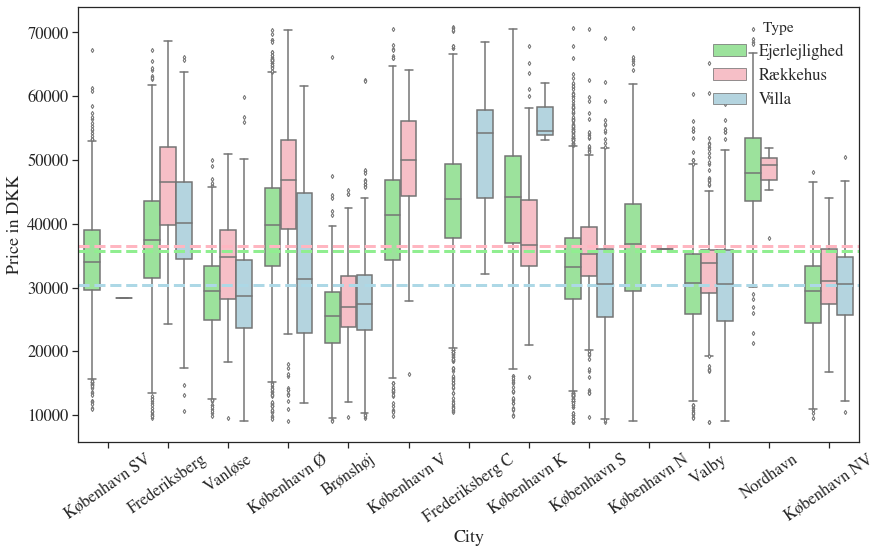

In [212]:
flatui = ['lightgreen', 'lightpink', 'lightblue']
#sns.palplot(sns.color_palette(flatui))

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})


# Change size
plt.rcParams["figure.figsize"] = (14,8)
# Change fontsize
plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)

#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')
sns.boxplot(y='SquareMetrePrice', x='City', 
            data=df, 
            palette=flatui,
            hue='Type', flierprops=flierprops);
plt.ylabel('Price in DKK')
plt.axhline(35784, label='Average square metre price for Ejerlejligheder', linestyle='--', color='lightgreen', linewidth=3.0)
plt.axhline(36547, label='Average square metre price for Rækkehus', linestyle='--', color='lightpink', linewidth=3.0)
plt.axhline(30333, label='Average square metre price for Villa', linestyle='--', color='lightblue', linewidth=3.0)
#plt.legend(fontsize=14)


plt.show()

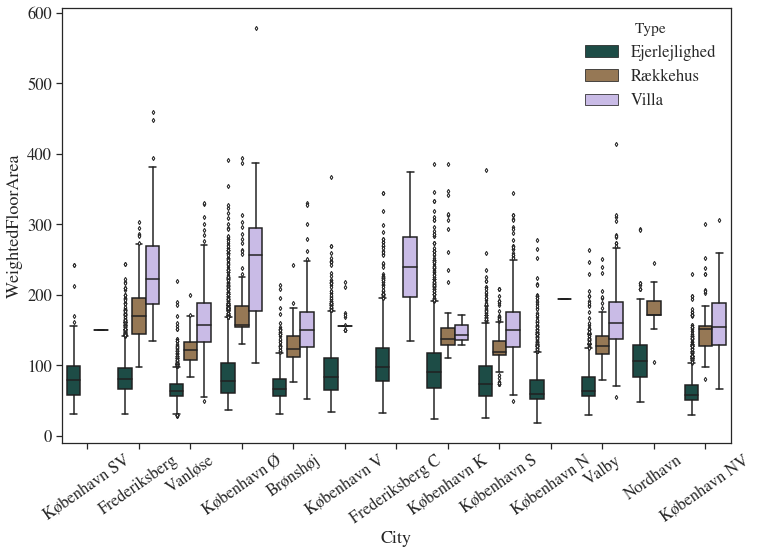

In [162]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Change size
plt.rcParams["figure.figsize"] = (12,8)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)

#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')
sns.boxplot(y='Square metre', x='City', 
            data=df, 
            palette="cubehelix",
            hue='Type', flierprops=flierprops);
#plt.ylabel('Average cost per square meter')
#plt.axhline(PricePerSquareMetreMean, label='Averager square metre price in Copenhagen', linestyle='--', color='gray', linewidth=4.0)


plt.show()

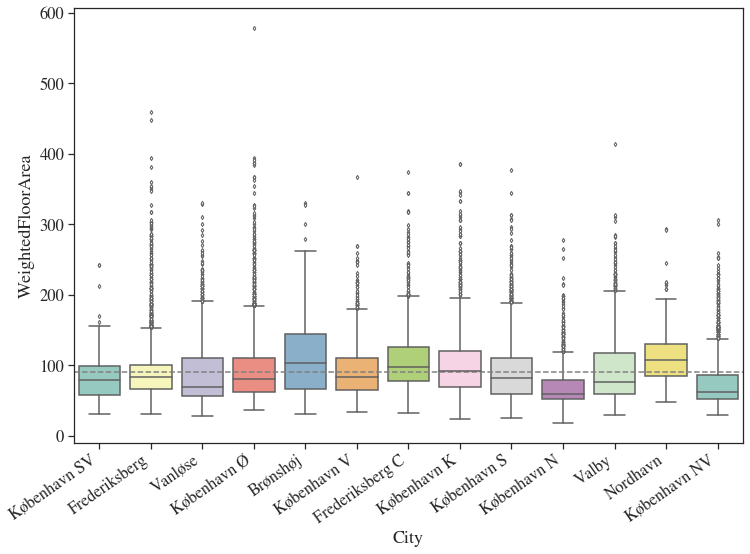

In [149]:
FloorAreaMean = np.mean(df['WeightedFloorArea'])

# Change size
plt.rcParams["figure.figsize"] = (12,8)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)
#plt.style.use('ggplot')

sns.boxplot(x="City", y="WeightedFloorArea", data=df, flierprops=flierprops, palette="Set3")
plt.axhline(FloorAreaMean, linestyle='--', color='grey')
plt.xticks(rotation=35, horizontalalignment='right')
plt.show()

In [32]:
df.EnergyLabel

GroupType = np.round(df.groupby('EnergyLabel', as_index=False).agg({"WeightedFloorArea": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupType


#print(GroupType.to_latex())

EnergyLabel WeightedFloorArea                                   
                          count    mean    std median   min    max
0           A              2227  115.48  31.15  112.0  35.0  317.0
1           B              2637  104.61  27.35  102.0  31.0  345.0
2           C              8117   89.06  37.54   83.0  26.0  394.0
3           D             15924   83.18  40.80   69.5  18.0  579.0
4           E              4774   92.22  50.38   72.0  26.0  414.0
5           F              1077  112.31  56.62   98.0  33.0  448.0
6      Fredet               579  115.71  57.12  103.0  24.0  392.0
7           G               367  117.63  62.60  103.0  40.0  460.0

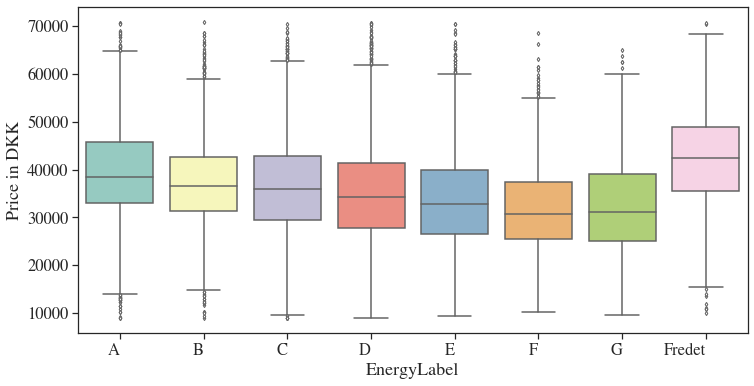

In [33]:
# EnergyLabel vs SquareMetrePrice
ordered_EnergyLabel = ['A','B','C','D','E','F','G','Fredet']

# Change size
plt.rcParams["figure.figsize"] = (12,6)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)
#plt.style.use('ggplot')

sns.boxplot(x="EnergyLabel", y="SquareMetrePrice", data=df, 
            flierprops=flierprops, palette="Set3", order=ordered_EnergyLabel)
plt.xticks(rotation=0, horizontalalignment='right')
plt.ylabel('Price in DKK')

plt.show()

In [34]:
df.shape

(35702, 78)

Executing shutdown due to inactivity...


2020-07-12 16:53:48,173 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-07-12 16:53:48,184 - INFO     - Executing shutdown...


/Users/joje/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 720x720 with 0 Axes>

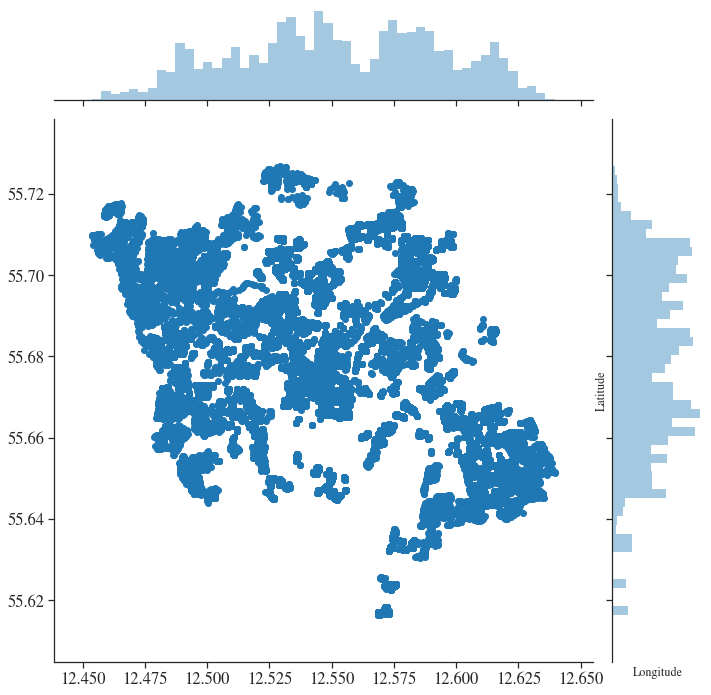

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [150]:
# Visualizing the location of the houses based on latitude and longitude.

plt.figure(figsize=(10,10))
sns.jointplot(x=df.Longitude.values, y=df.Latitude.values, size=10)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()
sns.despine

#Latitude

### A closer look at relation between Latest selling price and other variables

In [34]:
df_cor = df.copy()

cat = len(df_cor.select_dtypes(include=['object']).columns)
num = len(df_cor.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

corrmat = df_cor.corr()


Total Features:  21 categorical + 55 numerical = 76 features


### Numerical Features

In [35]:
# Remove distance variables
df.iloc[:, :44].columns

col_physical_characteristics = ['Address', 'AskingPrice', 'BasementArea', 'Bathrooms', 'BurglaryRisk',
       'CloudburstRisk', 'EnergyLabel', 'FloorAreaBuilding', 'FloorsTotal',
       'GeomaticAVMPrice', 'HeatSource', 'Kitchen', 'LandValue',
       'LargestParty', 'Latitude', 'Levels', 'LinkBoligsiden', 'LinkGeo',
       'Longitude', 'MASL', 'NoiseMeasurement', 'OfferingEnd', 'OfferingStart',
       'OuterWallMat', 'RadonRisk', 'Roofing', 'Rooms', 'SaleDate',
       'SalePrice', 'TaxableValue', 'Toilets', 'TotalFloorArea', 'Type',
       'TypeHouse', 'ValDate', 'VoteDistrict', 'VoterTurnout',
       'WeightedFloorArea', 'WorthPreserving', 'YearBuilt', 'YearRemodAdd',
       'TurnoverTime', 'ZipCode', 'City', 'PriceHouse', 'PriceFlat', 'SquareMetrePrice',
       'SquareMetrePrice_range', 'GeomaticAVMPricePerMetre',
       'GeomaticAVMPricePerMetre_range', 'Quarter', 'Year', 'YearQuarter',
       'PriceReduction', 'HasMultipleLevels']

StatsNum = np.round(df[col_physical_characteristics].describe(), 2).T[['count', 'mean', 'std', 'min', 'max']]
StatsNum

count                     mean  \
AskingPrice               35951              3.39996e+06   
BasementArea              35951                     6.34   
Bathrooms                 35951                     1.06   
FloorAreaBuilding         35951                  4282.68   
FloorsTotal               35951                     4.65   
GeomaticAVMPrice          35853              3.80893e+06   
LandValue                 35890                   376285   
Latitude                  35951                    55.68   
Levels                    35951                     1.05   
Longitude                 35951                    12.55   
MASL                      35951                     7.96   
Rooms                     35951                     3.04   
SalePrice                 35951               3.2699e+06   
TaxableValue              35890              1.90397e+06   
Toilets                   35951                     1.15   
TotalFloorArea            35951                    88.93   
VoterTurnout              35951                    84.39   
WeightedFloorArea         35951                    91.32   
WorthPreserving           35951                     0.43   
YearBuilt                 35951                  1938.24   
YearRemodAdd              35951                  1948.17   
TurnoverTime              35951  79 days 22:03:48.110483   
ZipCode                   35951                  2180.24   
PriceHouse                35951                    98.92   
PriceFlat                 35951                   113.78   
SquareMetrePrice          35951                  35416.1   
GeomaticAVMPricePerMetre  35853                  41435.4   
Quarter                   35951                     2.43   
Year                      35951                  2016.62   
PriceReduction            35951                     6.76   
HasMultipleLevels         35951                     0.04   

                                              std              min  \
AskingPrice                            2.0111e+06           195000   
BasementArea                                43.36                0   
Bathrooms                                    0.33                0   
FloorAreaBuilding                         6960.34               35   
FloorsTotal                                  2.29                1   
GeomaticAVMPrice                      2.08999e+06           303349   
LandValue                                  496705                0   
Latitude                                     0.02            55.62   
Levels                                       0.26                1   
Longitude                                    0.04            12.45   
MASL                                         5.93                0   
Rooms                                        1.31                1   
SalePrice                             1.94795e+06           220000   
TaxableValue                          1.12842e+06           110000   
Toilets                                      0.45                0   
TotalFloorArea                              39.17               17   
VoterTurnout                                    4             70.7   
WeightedFloorArea                           43.18               17   
WorthPreserving                              1.39                0   
YearBuilt                                   46.94             1623   
YearRemodAdd                                 44.5             1624   
TurnoverTime              87 days 15:11:49.152948  0 days 00:00:00   
ZipCode                                    353.24             1051   
PriceHouse                                   8.05             81.4   
PriceFlat                                   12.04             87.5   
SquareMetrePrice                          10442.2          5896.34   
GeomaticAVMPricePerMetre                   8516.4           6190.8   
Quarter                                      1.08                1   
Year                                         1.56             2014   
Price

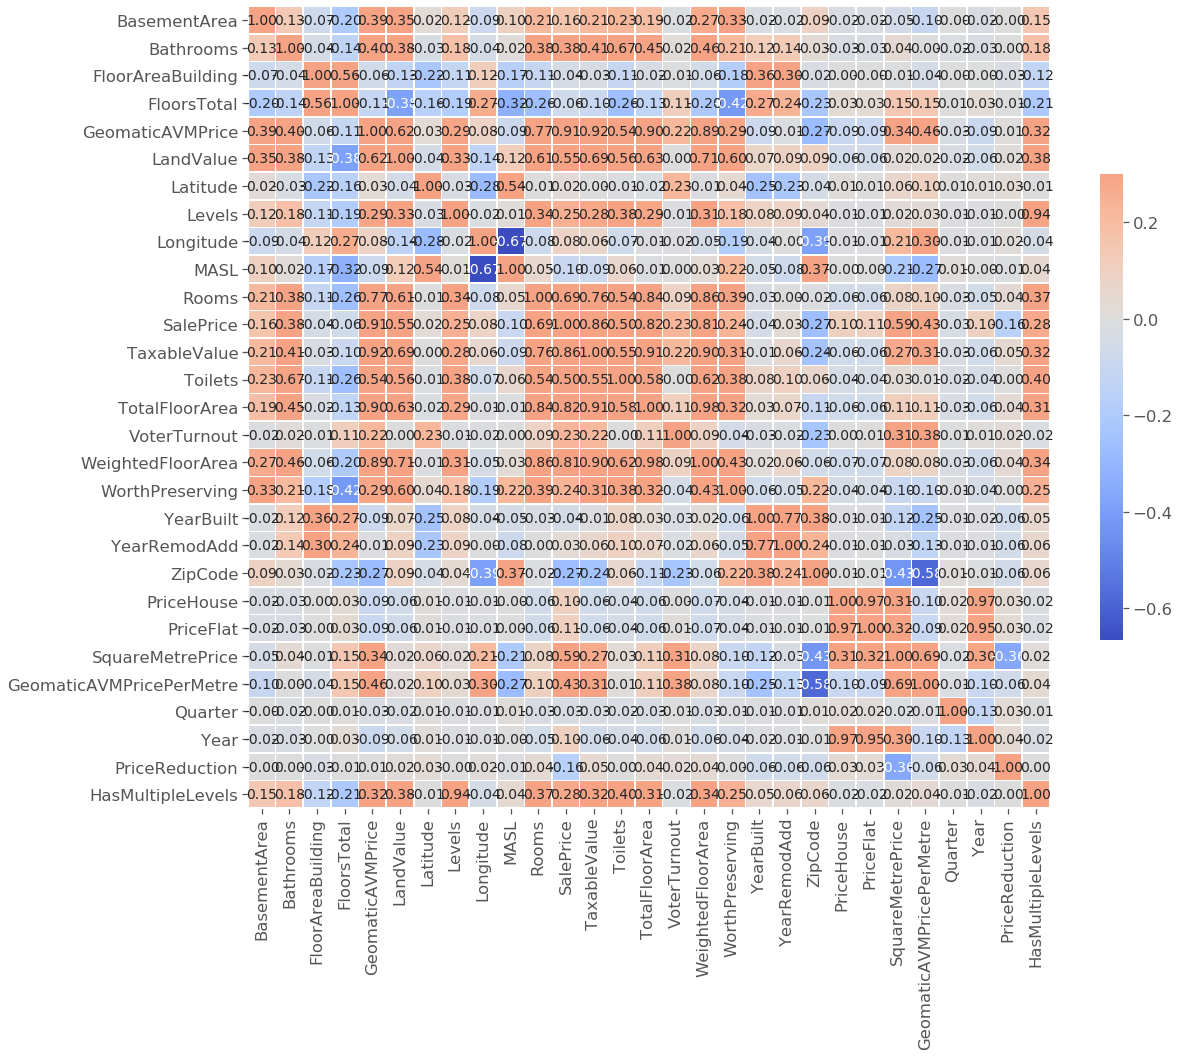

In [36]:
corr = df[col_physical_characteristics].select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()

g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(16,16)
    
plt.show()

In [37]:
# Correlation between attributes with SalePrice
corr_list = corr['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

GeomaticAVMPrice            0.906382
TaxableValue                0.864023
TotalFloorArea              0.818475
WeightedFloorArea           0.806935
Rooms                       0.686382
SquareMetrePrice            0.589237
LandValue                   0.553164
Toilets                     0.495305
GeomaticAVMPricePerMetre    0.427190
Bathrooms                   0.382706
HasMultipleLevels           0.278758
Levels                      0.253784
WorthPreserving             0.237594
VoterTurnout                0.229769
BasementArea                0.162303
PriceFlat                   0.107129
PriceHouse                  0.101395
Year                        0.098645
Longitude                   0.082759
YearRemodAdd                0.029576
Latitude                    0.022000
Quarter                    -0.028585
FloorAreaBuilding          -0.038638
YearBuilt                  -0.044466
FloorsTotal                -0.064205
MASL                       -0.095616
PriceReduction             -0.163153
Z

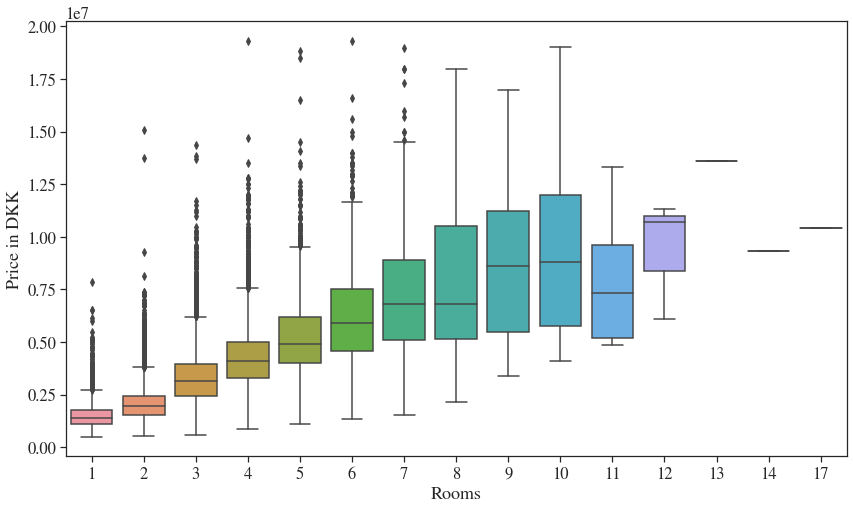

In [269]:
# Rooms vs SalePrice
sns.boxplot(x=df['Rooms'], y=df['SalePrice'])
plt.ylabel('Price in DKK')
plt.show()

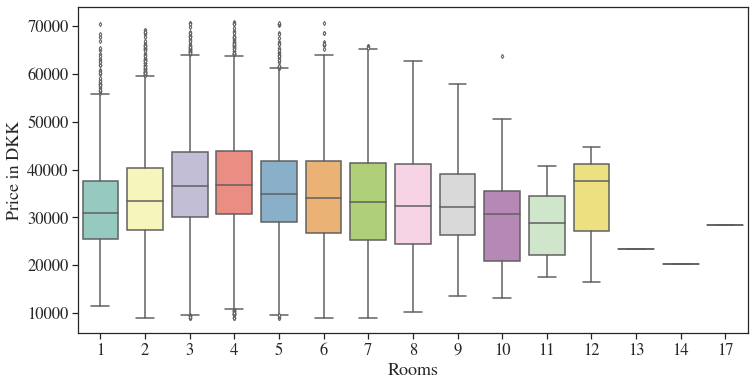

In [284]:
# Rooms vs SquareMetrePrice

plt.rcParams["figure.figsize"] = (12,6)

sns.boxplot(x=df['Rooms'], y=df['SquareMetrePrice'], flierprops=flierprops, palette="Set3")
plt.ylabel('Price in DKK')
plt.show()


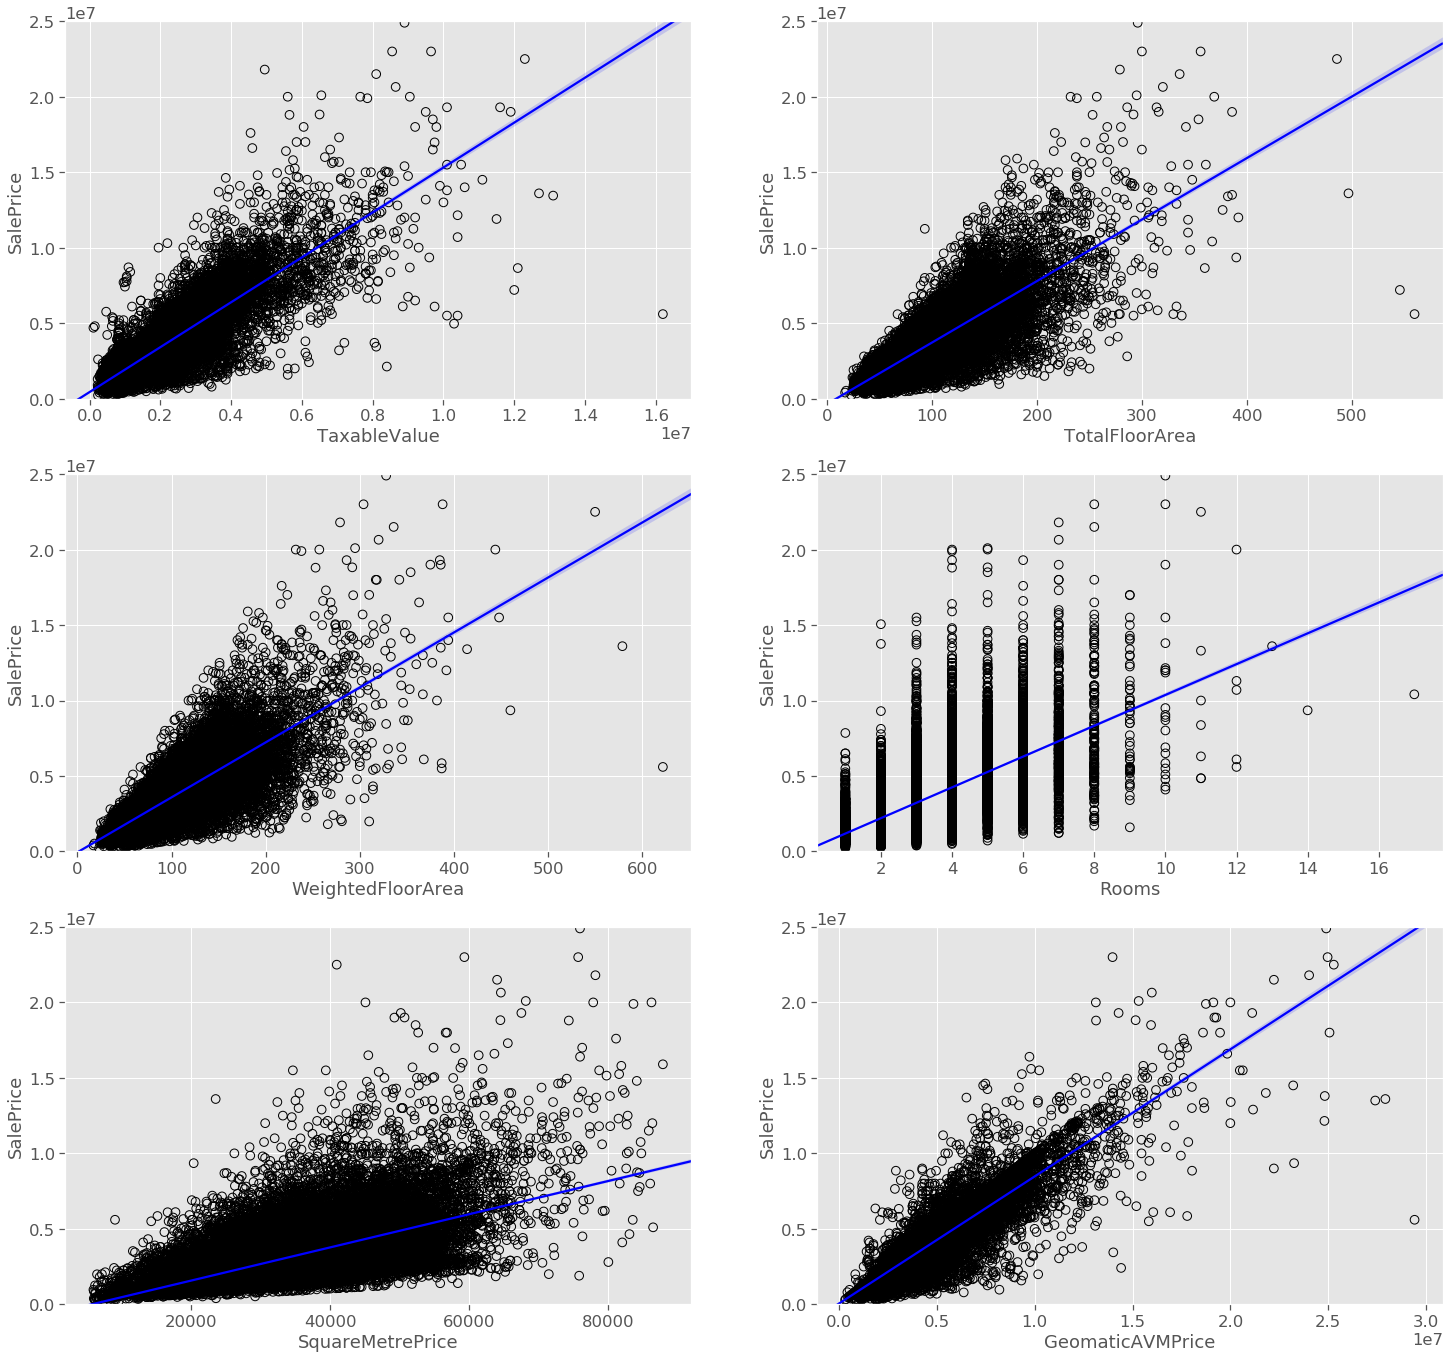

In [40]:
# Scatter plotting the top related to SalePrice
plt.figure(figsize=(22, 22))
k = 6

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sns.regplot(x=feature, y='SalePrice', data=df, scatter=False, color='b')
    ax=plt.gca()
    ax.set_ylim([0,25000000])

/Users/joje/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

/Users/joje/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/Users/joje/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



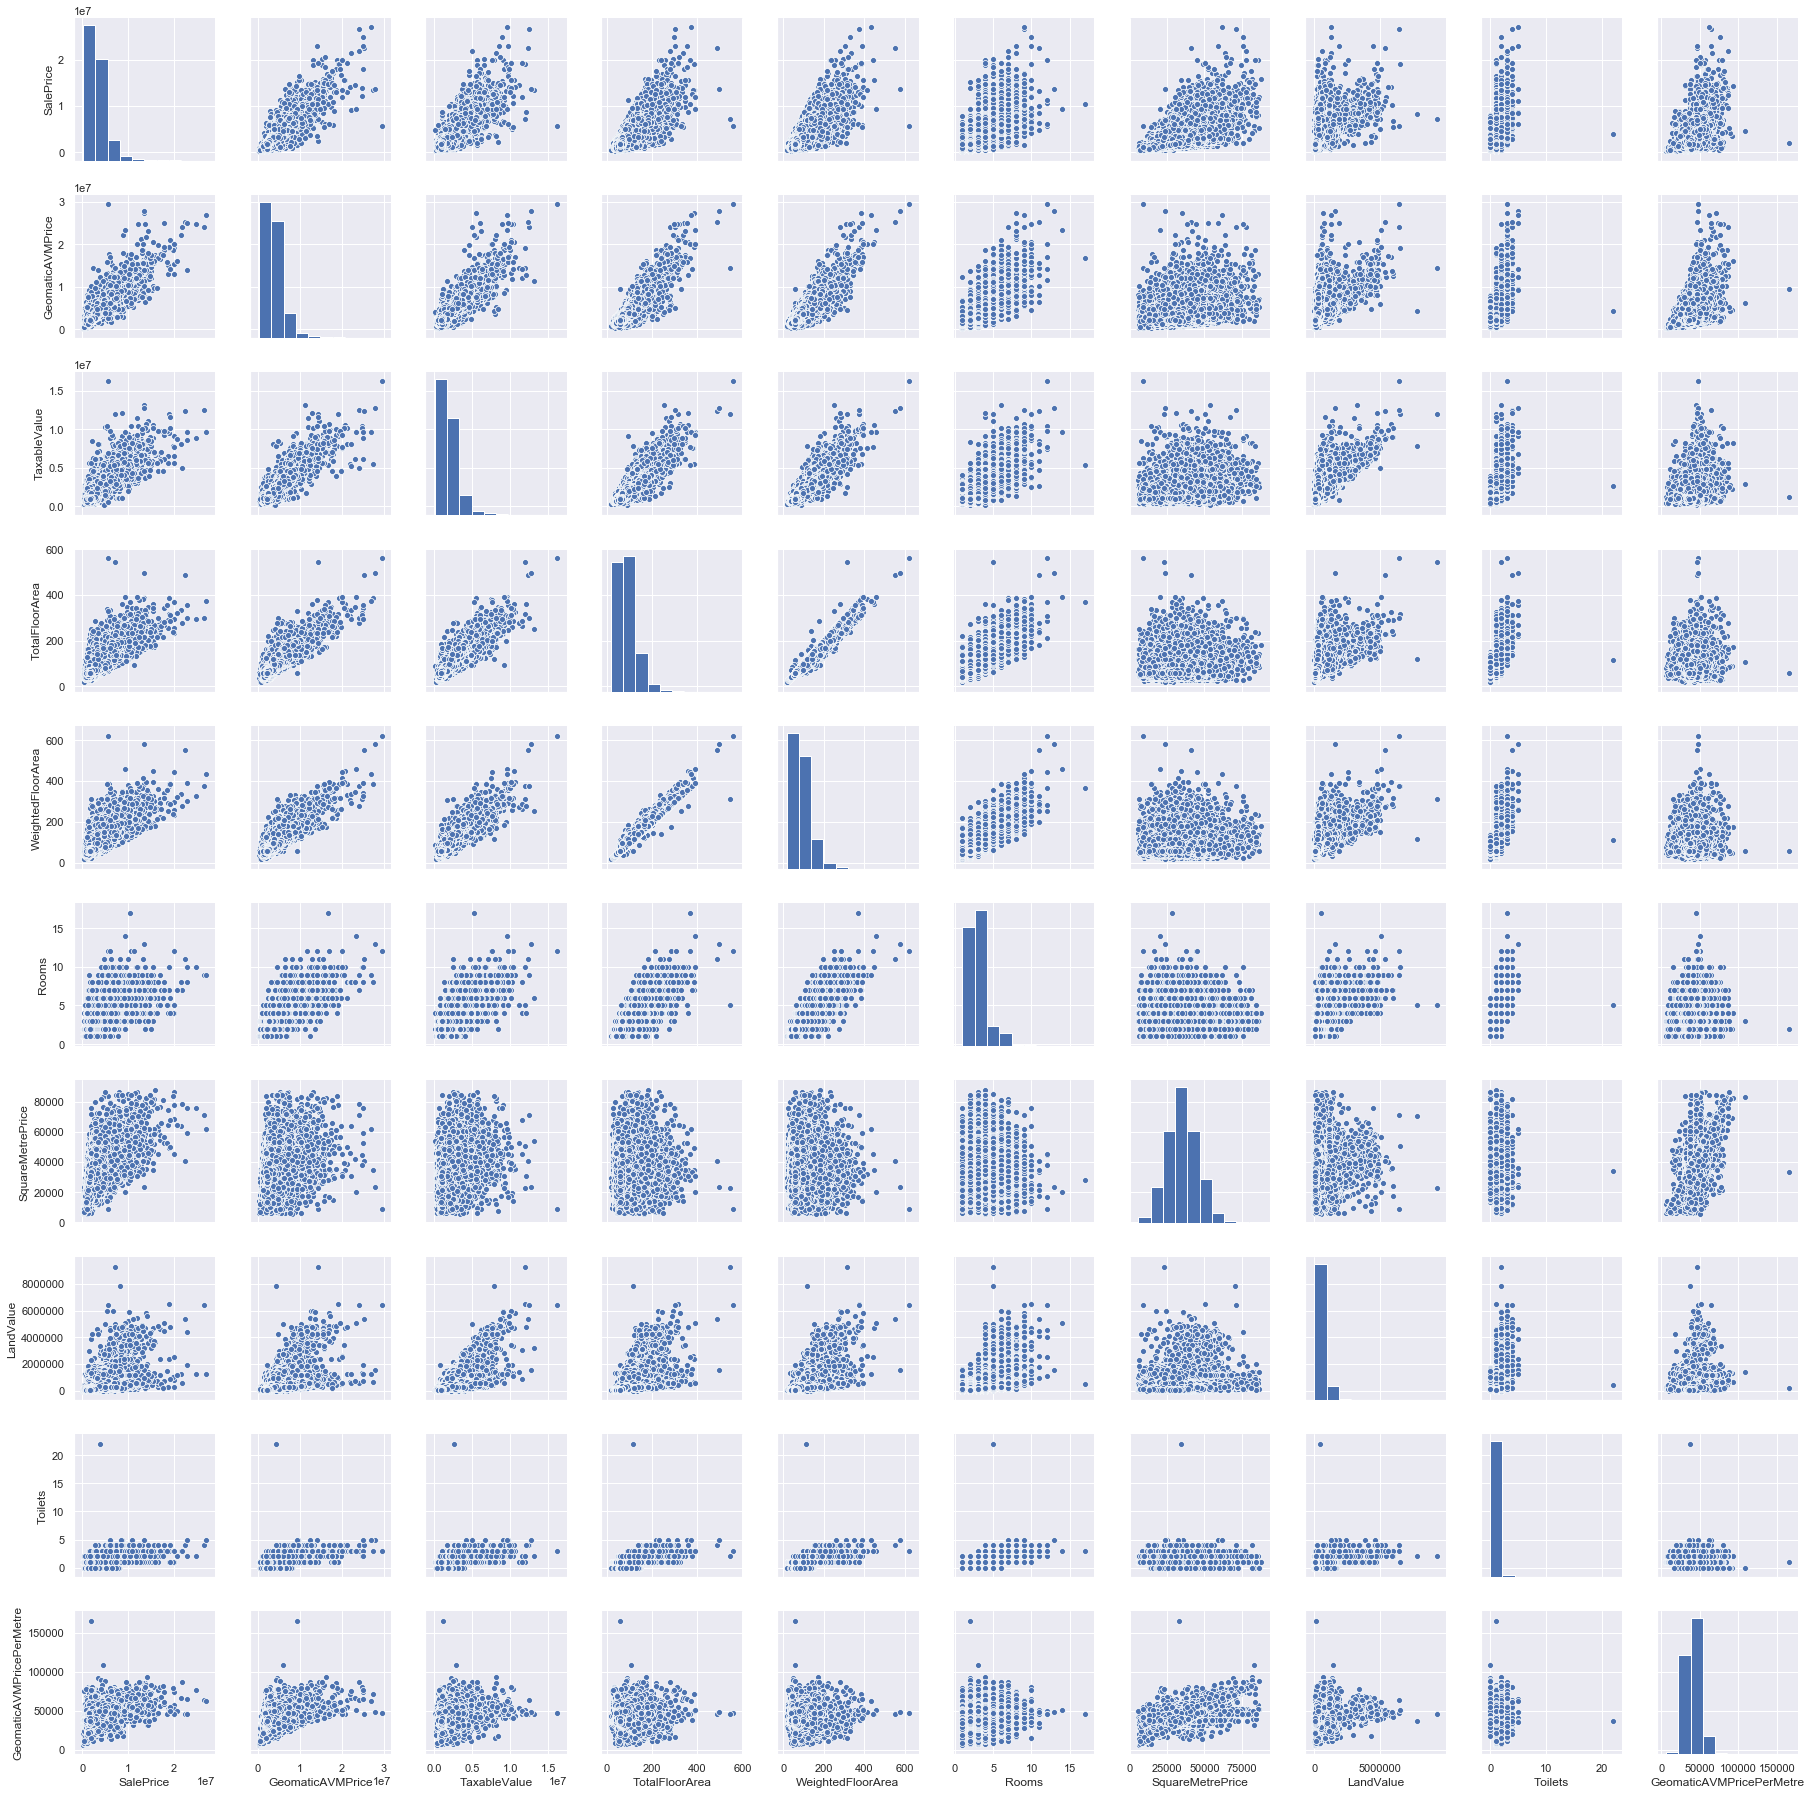

In [41]:
# Scatter plotting the variables most correlated with SalePrice
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
sns.set()
sns.pairplot(df[cols], size=2.5)
plt.show()

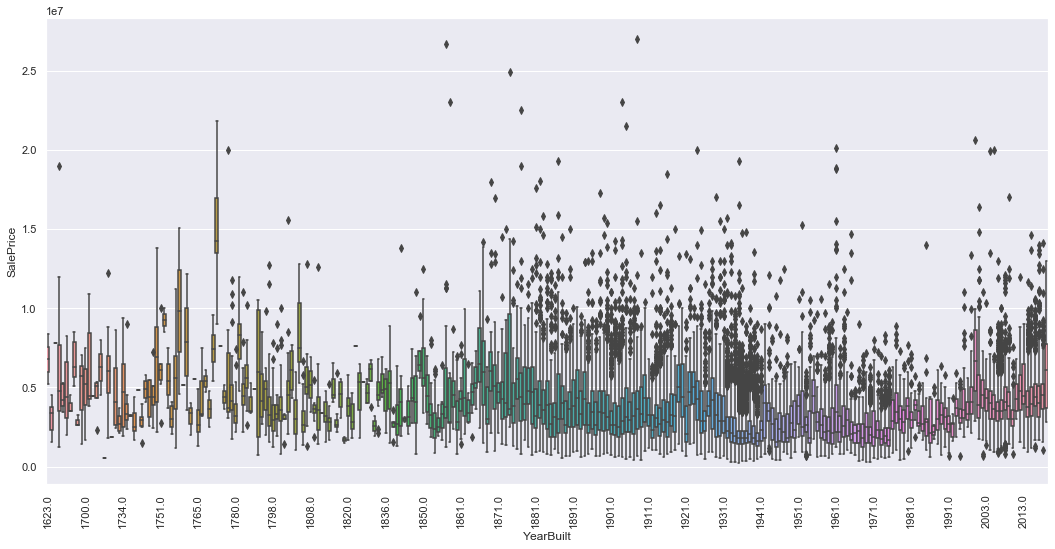

In [42]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%10 != 0:
        tick.label1.set_visible(False)

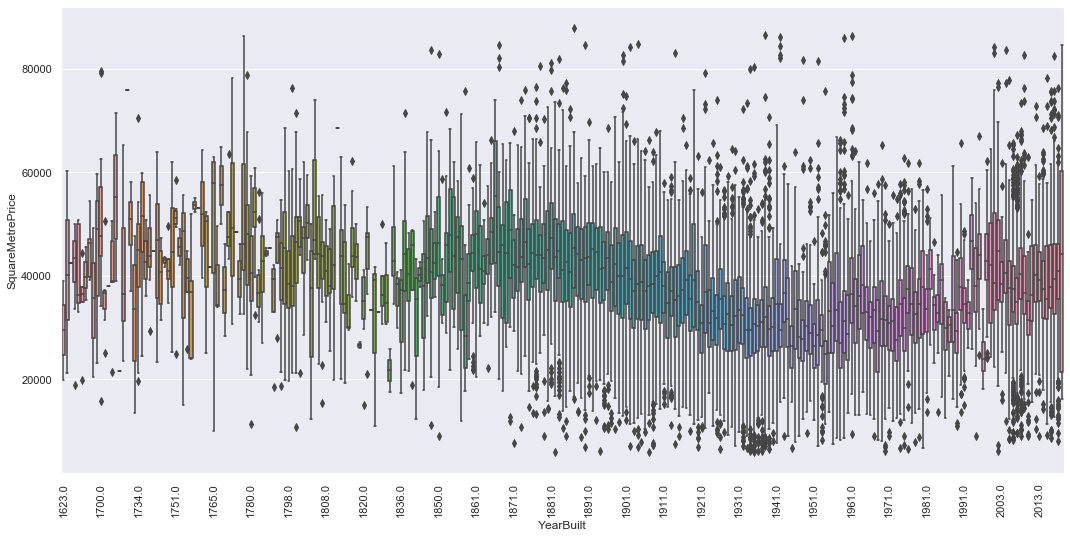

In [43]:
var = 'YearBuilt'
data = pd.concat([df['SquareMetrePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SquareMetrePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%10 != 0:
        tick.label1.set_visible(False)

### Distance

In [239]:
df.iloc[:, 44:].columns

Index(['School', 'RoadTrain', 'Motorway', 'Daycare', 'Metro', 'Doctor',
       'Soccerfield', 'Hospital', 'BusStop', 'Lake', 'Supermarket', 'Pharmacy',
       'STrain', 'Airport', 'Train', 'Library', 'PublicBath', 'Coast',
       'SportsHall', 'Forest', 'PriceIndex', 'OMXC20', 'Mortgage',
       'Unemployed', 'UnemploymentRelativeToLabourForce', 'Births',
       'SquareMetrePrice', 'Quarter', 'Year', 'YearQuarter', 'PriceReduction',
       'HasMultipleLevels', 'BuildAge', 'RemodAfterBuild', 'SalePriceRange',
       'SaleYear', 'DaysTurnoverTime'],
      dtype='object')

In [242]:
col_hvorlangterder = ['School', 'RoadTrain', 'Motorway', 'Daycare', 'Metro', 'Doctor', 'Soccerfield', 
                      'Hospital', 'BusStop', 'Lake', 'Supermarket', 'Pharmacy', 'STrain',
                       'Airport', 'Train', 'Library', 'PublicBath', 'Coast', 'SportsHall', 'Forest', 'SalePrice', 'SquareMetrePrice']

col_hvorlangterder = ['Airport', 'BusStop', 'Coast', 'Daycare', 'Doctor', 'Forest', 
                      'Hospital', 'Lake', 'Library', 'Metro', 'Motorway', 'Pharmacy', 'PublicBath',
                      'RoadTrain', 'School', 'Soccerfield', 'SportsHall', 'STrain', 'Supermarket', 'Train', 'SalePrice', 'SquareMetrePrice']


#col_hvorlangterder = ['', '', 'Motorway', '', '', '', '', 
#                      '', 'BusStop', '', '', '', '',

pd.options.display.float_format = '{:.2f}'.format

StatsDist = np.round(df[col_hvorlangterder].describe(), 2).T[['count', 'mean', 'std', 'min', 'max']]
StatsDist

count       mean        std       min         max
Airport          35702.00    9903.42    3134.53   2481.29    17199.77
BusStop          35702.00     220.55     135.03     12.35     1226.21
Coast            35702.00    2533.01    1918.26     12.69     9517.16
Daycare          35702.00     315.11     185.23     17.54     1489.15
Doctor           35702.00     525.38     389.66     10.09     2603.05
Forest           35702.00    5281.71    1455.62    391.79     8441.41
Hospital         35702.00    2300.80    1183.42     87.07     6451.71
Lake             35702.00    1523.79    1012.24     38.01     5626.16
Library          35702.00     865.75     443.01     16.44     2726.41
Metro            35702.00    1128.14     923.36     31.23     4830.45
Motorway         35702.00    3057.24    1236.23    210.09     5912.88
Pharmacy         35702.00     755.04     425.54     15.13     2776.94
PublicBath       35702.00    1489.78     746.99     24.80     3676.37
RoadTrain        35702.00    5093.76    1925.01    302.62     8944.08
School           35702.00     504.55     284.15     30.23     2320.13
Soccerfield      35702.00     969.40     456.06     52.79     2947.06
SportsHall       35702.00    1375.58     634.71     37.99     4080.93
STrain           35702.00    1603.23    1411.17     57.36     6177.97
Supermarket      35702.00     373.55     250.75      6.13     1901.15
Train            35702.00    2518.17    1302.95     57.36     7884.26
SalePrice        35702.00 3251839.57 1867317.43 510000.00 19300000.00
SquareMetrePrice 35702.00   35378.98   10084.39   8876.92    70886.52

(35702, 81)

In [266]:
# Do for n=(0-19)
n=2
np.round(df[col_hvorlangterder[n]].loc[df[col_hvorlangterder[n]] < 1000].describe(), 2)[['mean', 'std', 'count', 'max']]


mean     469.71
std      314.20
count   8664.00
max      999.25
Name: Coast, dtype: float64

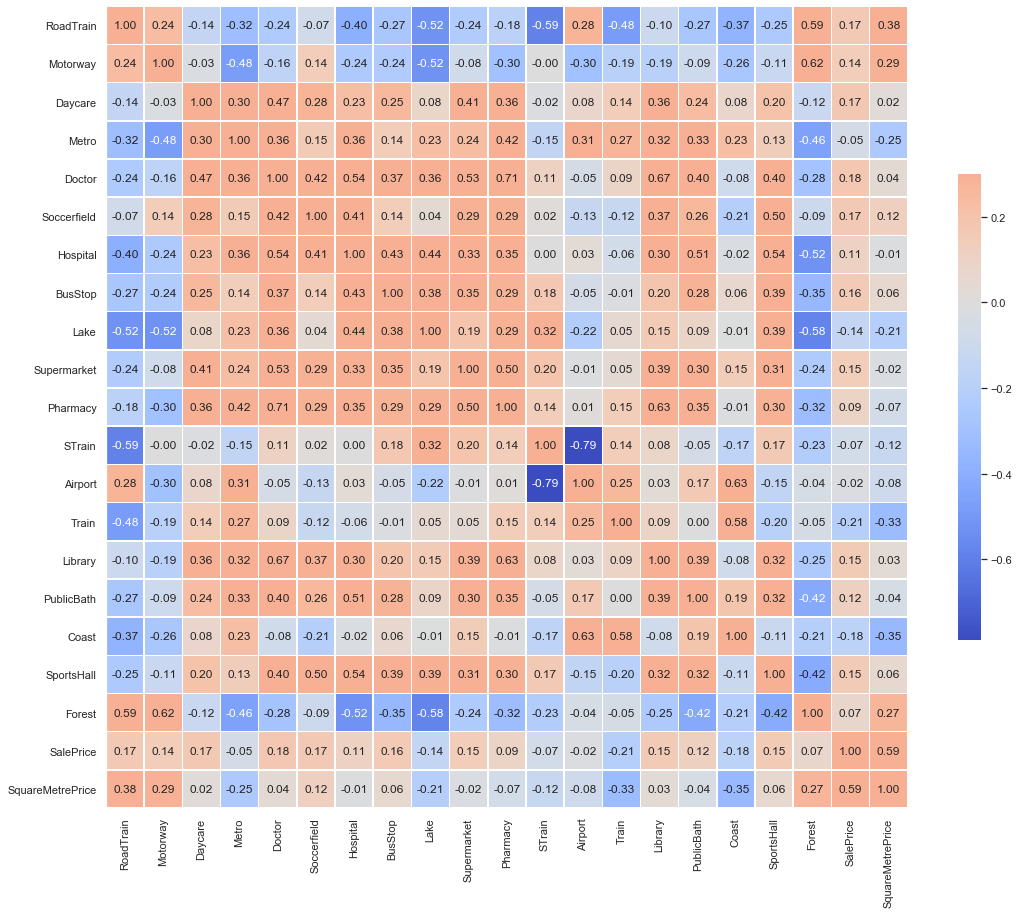

In [47]:
corr_dist = df[col_hvorlangterder].select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()

g_dist = sns.heatmap(corr_dist,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g_dist.figure.set_size_inches(16,16)
    
plt.show()

In [48]:
# Correlation between attributes with SalePrice
corr_list_dist = corr_dist['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list_dist
print(corr_list_dist.to_latex())


\begin{tabular}{lr}
\toprule
{} &  SalePrice \\
\midrule
SquareMetrePrice &   0.589237 \\
Doctor           &   0.179637 \\
Daycare          &   0.172560 \\
RoadTrain        &   0.169881 \\
Soccerfield      &   0.168272 \\
BusStop          &   0.161165 \\
SportsHall       &   0.153803 \\
Library          &   0.152392 \\
Supermarket      &   0.145947 \\
Motorway         &   0.144893 \\
PublicBath       &   0.118066 \\
Hospital         &   0.107436 \\
Pharmacy         &   0.094017 \\
Forest           &   0.069359 \\
Airport          &  -0.016686 \\
Metro            &  -0.052153 \\
STrain           &  -0.065205 \\
Lake             &  -0.138386 \\
Coast            &  -0.175826 \\
Train            &  -0.206056 \\
\bottomrule
\end{tabular}



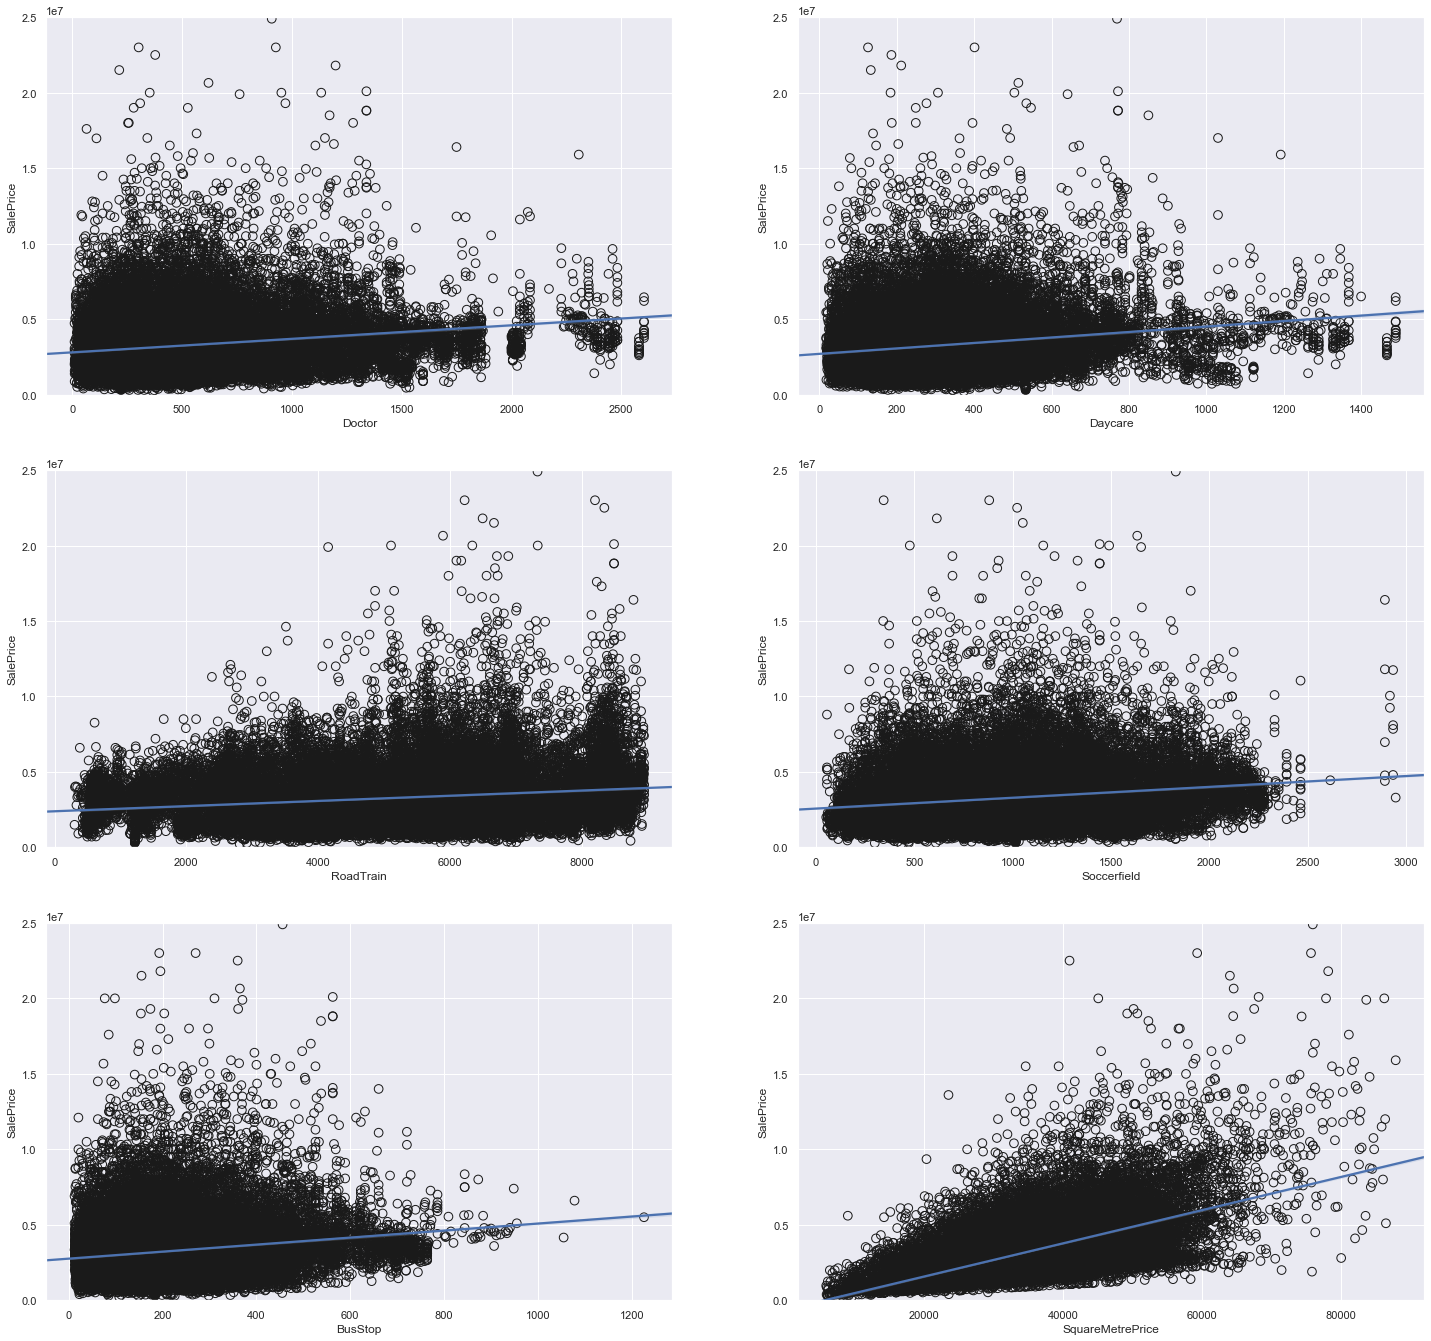

In [49]:
# Scatter plotting the top related to SalePrice
plt.figure(figsize=(22, 22))
k = 6

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list_dist.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sns.regplot(x=feature, y='SalePrice', data=df, scatter=False, color='b')
    ax=plt.gca()
    ax.set_ylim([0,25000000])

### Categorical Features

In [50]:
col_house

NameError: name 'col_house' is not defined

In [ ]:
cat_df = df[col_house].select_dtypes(include=['object']).iloc[:,1:]
cat_df.dtypes
#cat_df.dtypes[:].index.values

In [ ]:
for cat in cat_df.dtypes[:].index.values:
    plt.figure(figsize=(16, 22))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='SalePrice', data=df)    
    plt.show()

In [ ]:
# EnergyLabel vs SquareMetrePrice
ordered_EnergyLabel = ['A','B','C','D','E','F','G']
sns.boxplot(x=df['EnergyLabel'], y=df['SquareMetrePrice'],
           order=ordered_EnergyLabel)

In [ ]:
# EnergyLabel vs SalePrice
ordered_EnergyLabel = ['A','B','C','D','E','F','G']

sns.boxplot(x=df['EnergyLabel'], y=df['SalePrice'],
           order=ordered_EnergyLabel)

In [ ]:
# RadonRisk SalePrice
ordered_RadonRisk = ['Meget lav','lav','medium','høj','meget høj']
sns.boxplot(x=df['RadonRisk'], y=df['SquareMetrePrice'],
            order=ordered_RadonRisk)

In [ ]:
# BurglaryRisk vs SalePrice
ordered_BurglaryRisk = ['lav','mellem','høj','meget høj']

sns.boxplot(x=df['BurglaryRisk'], y=df['SquareMetrePrice'],
           order=ordered_BurglaryRisk)


In [ ]:
# NoiseMeasurement vs SalePrice
#ordered_BurglaryRisk = ['lav','mellem','høj','meget høj']

sns.boxplot(x=df['NoiseMeasurement'], y=df['SquareMetrePrice'])


In [ ]:
# SquareMetrePrice and categorical variables

for cat in cat_df.dtypes[:].index.values:
    plt.figure(figsize=(16, 22))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='SquareMetrePrice', data=df)    
    plt.show()

In [ ]:
sns.boxplot(x=df['LargestParty'], y=df['SalePrice'],
           hue=df['Type'])

In [ ]:
data_crosstab = pd.crosstab(df['WorthPreserving'],
                            df['Type'], margins = True) 

#print(data_crosstab.to_latex())
data_crosstab

In [ ]:

plt.rcParams["figure.figsize"] = (8,9)
plt.style.use('ggplot')

props_abs = df.groupby(['City', 'year']).size().reset_index().pivot(columns='year', index='City', values=0)
props_abs.plot(kind='bar', stacked=True)
plt.show()


props_procent = df.groupby("City")['year'].value_counts(normalize=True).unstack()
props_procent.plot(kind='bar', stacked=True)
plt.show()


In [ ]:
cols_float = df.select_dtypes(include=['int64','float64']).columns
cols_float = ['AskingPrice', 'BasementArea', 'Bathrooms', 'FloorAreaBuilding',
       'FloorsTotal', 'GeomaticAVMPrice', 'LandValue', 'Latitude', 'Levels',
       'Longitude', 'MASL', 'Rooms', 'SalePrice', 'TaxableValue', 'Toilets',
       'TotalFloorArea', 'VoterTurnout', 'WeightedFloorArea',
       'WorthPreserving', 'YearBuilt', 'YearRemodAdd', 'ZipCode', 'School',
       'RoadTrain', 'Motorway', 'Daycare', 'Metro', 'Doctor', 'Soccerfield',
       'Hospital', 'BusStop', 'Lake', 'Supermarket', 'Pharmacy', 'STrain',
       'Airport', 'Train', 'Library', 'PublicBath', 'Coast', 'SportsHall',
       'Forest', 'PriceHouse', 'PriceFlat', 'SquareMetrePrice',
       'GeomaticAVMPricePerMetre', 'Quarter', 'Year', 'PriceReduction',
       'HasMultipleLevels', 'City']

groupby_city_mean = df[cols_float].groupby('City', as_index=False).mean()
House_avg = df[cols_float].mean()
m2_price_avg = np.mean(df['SquareMetrePrice'])
m2_price_avg

Executing shutdown due to inactivity...


2020-04-07 12:19:29,955 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-04-07 12:19:30,005 - INFO     - Executing shutdown...


## Turnovertime

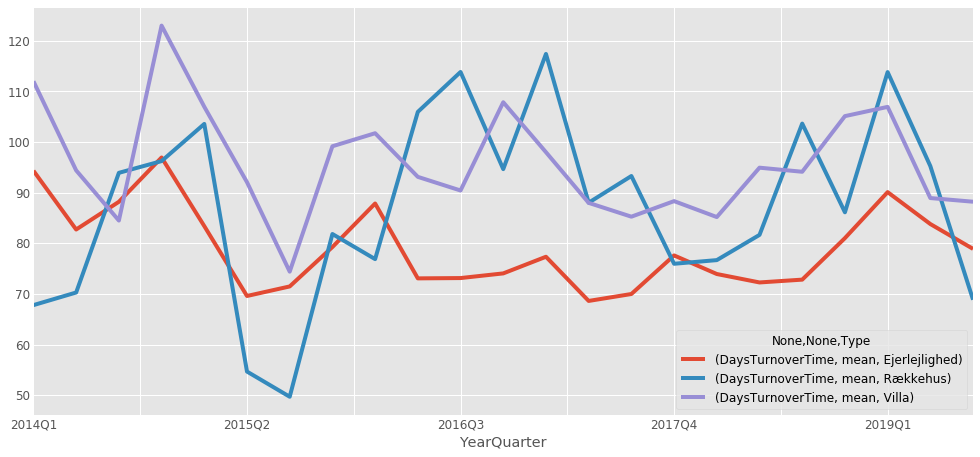

In [98]:
df['DaysTurnoverTime'] = df.TurnoverTime.dt.days


# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['YearQuarter','Type']).agg({'DaysTurnoverTime':['mean']}).unstack().plot(ax=ax)


In [151]:
GroupCity = np.round(df.groupby('Type', as_index=False).agg({"DaysTurnoverTime": ['count', 'mean','std', 'median', 'min', 'max']}),2)
column_names = ['group', 'N', 'mean', 'std', 'median', 'min', 'max']
GroupCity.columns = column_names 
GroupCity = GroupCity.set_index('group')

#print(GroupCity.to_latex())
GroupCity

N   mean    std  median  min   max
group                                                
Ejerlejlighed  31512  78.06  86.55      51    0  2167
Rækkehus        1457  88.96  92.05      61    0   685
Villa           2878  95.49  94.97      69    0  1156

2020-06-19 12:15:52,294 - WARNING  - No handles with labels found to put in legend.


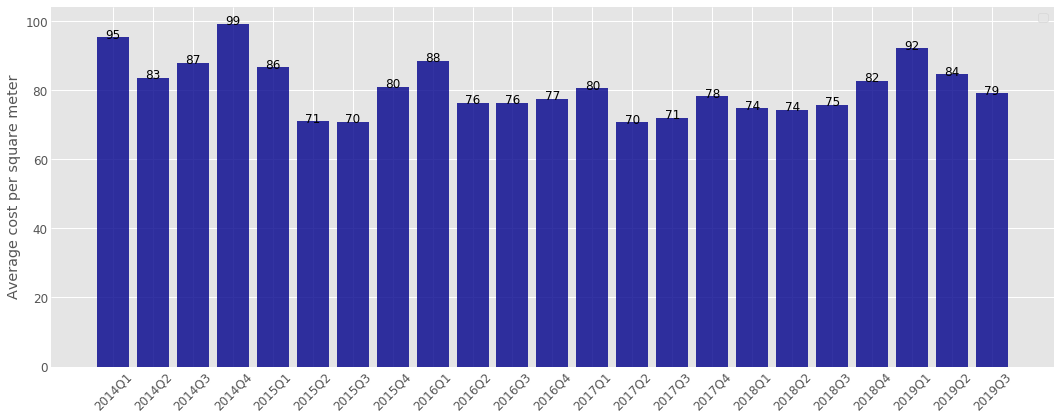

In [152]:
plt.figure(figsize=(16,10))
opacity = 0.8

# Plot the data
data_line = plt.bar(QuarterM2['YearQuarter'], QuarterM2['DaysTurnoverTime']['mean'], color='darkblue', alpha=opacity)

# Change fontsize
plt.rcParams['font.size'] = 12

# Make a legend
plt.legend()
plt.xticks(rotation = 45)

#
plt.subplots_adjust(bottom= 0.6, top = 1.1)

#plt.title('Average price per m2 in different areas of Copenhagen', fontsize=16)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove all the ticks and directly label each bar with respective value
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.ylabel('Average cost per square meter')

# direct label each bar with Y axis values
for bari in data_line:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=12)
    
#plt.savefig("Averagepricem2cph.png", bbox_inches="tight")
#plt.show()

In [156]:
GroupCity = np.round(df.groupby('City', as_index=False).agg({"DaysTurnoverTime": ['mean','std', 'median', 'min', 'max']}),2)
column_names = ['group', 'mean', 'std', 'median', 'min', 'max']
GroupCity.columns = column_names 
GroupCity = GroupCity.set_index('group')

print(GroupCity.to_latex())
GroupCity

\begin{tabular}{lrrrrr}
\toprule
{} &    mean &     std &  median &  min &   max \\
group           &         &         &         &      &       \\
\midrule
Brønshøj        &   84.21 &   88.55 &    57.0 &    0 &  1016 \\
Frederiksberg   &   71.22 &   71.54 &    48.0 &    0 &   831 \\
Frederiksberg C &   77.62 &   78.73 &    54.0 &    0 &   764 \\
København K     &   96.36 &  100.03 &    68.0 &    0 &   953 \\
København N     &   69.13 &   86.42 &    42.0 &    0 &  1756 \\
København NV    &   67.38 &   75.73 &    41.0 &    0 &  1099 \\
København S     &   80.89 &   89.97 &    54.0 &    0 &  1451 \\
København SV    &   83.78 &  103.12 &    57.0 &    0 &  2167 \\
København V     &   85.90 &   96.77 &    55.0 &    0 &   986 \\
København Ø     &   78.99 &   78.59 &    57.0 &    0 &  1170 \\
Nordhavn        &  170.90 &  178.76 &   114.5 &    0 &   880 \\
Valby           &   78.82 &   80.60 &    52.0 &    0 &   734 \\
Vanløse         &   74.88 &   79.38 &    46.0 &    0 &   694 \\
\bottomrule

mean     std  median  min   max
group                                             
Brønshøj          84.21   88.55    57.0    0  1016
Frederiksberg     71.22   71.54    48.0    0   831
Frederiksberg C   77.62   78.73    54.0    0   764
København K       96.36  100.03    68.0    0   953
København N       69.13   86.42    42.0    0  1756
København NV      67.38   75.73    41.0    0  1099
København S       80.89   89.97    54.0    0  1451
København SV      83.78  103.12    57.0    0  2167
København V       85.90   96.77    55.0    0   986
København Ø       78.99   78.59    57.0    0  1170
Nordhavn         170.90  178.76   114.5    0   880
Valby             78.82   80.60    52.0    0   734
Vanløse           74.88   79.38    46.0    0   694

In [78]:
GroupCityType = np.round(df.groupby(['City', 'Type']).agg({"DaysTurnoverTime": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupCityType


DaysTurnoverTime                             \
                                         count    mean     std median min   
City            Type                                                        
Brønshøj        Ejerlejlighed              900   70.66   82.05   45.0   0   
                Rækkehus                   152   96.62   92.05   69.0   1   
                Villa                      773   97.55   92.76   73.0   0   
Frederiksberg   Ejerlejlighed             3668   69.76   69.02   48.0   0   
                Rækkehus                    88   75.52   71.52   57.0   0   
                Villa                      158  102.73  111.38   64.5   0   
Frederiksberg C Ejerlejlighed             1756   77.64   78.97   54.0   0   
                Villa                       22   76.59   57.08   74.0   0   
København K     Ejerlejlighed             2483   95.98   99.89   69.0   0   
                Rækkehus                    97  106.77  104.13   64.0   0   
                Villa                        3   75.33   80.70   44.0  15   
København N     Ejerlejlighed             2578   69.15   86.43   42.0   0   
                Villa                        1   23.00     NaN   23.0  23   
København NV    Ejerlejlighed             1641   63.22   68.13   36.0   0   
                Rækkehus                    57   96.95  109.31   67.0   0   
                Villa                      187   94.93  111.32   59.0   1   
København S     Ejerlejlighed             6879   78.85   88.98   52.0   0   
                Rækkehus                   412   93.68   94.56   69.0   0   
                Villa                      784   92.07   94.80   64.5   0   
København SV    Ejerlejlighed             1400   83.83  103.14   57.0   0   
                Villa                        1   13.00     NaN   13.0  13   
København V     Ejerlejlighed             1896   85.86   96.75   55.0   0   
                Rækkehus                    31   88.61   99.55   70.0   2   
København Ø     Ejerlejlighed             4279   78.48   77.69   57.0   0   
                Rækkehus                   206   79.40   88.01   53.0   0   
                Villa                       37  135.38  104.73  132.0   1   
Nordhavn        Ejerlejlighed              337  169.06  178.51  113.0   0   
                Rækkehus                     9  239.89  184.68  164.0  47   
Valby           Ejerlejlighed             2210   75.16   77.65   48.5   0   
                Rækkehus                   296   80.77   76.90   60.0   0   
                Villa                      494   94.01   93.10   65.0   0   
Vanløse         Ejerlejlighed             1485   68.80   74.65   42.0   0   
                Rækkehus                   109   79.19   96.41   41.0   1   
                Villa                      418   95.37   87.12   71.5   0   

                                     
                                max  
City            Type                 
Brønshøj        Ejerlejlighed  1016  
                Rækkehus        460  
                Villa           892  
Frederiksberg   Ejerlejlighed   831  
                Rækkehus        344  
                Villa           762  
Frederiksberg C Ejerlejlighed   764  
                Villa           212  
København K     Ejerlejlighed   953  
                Rækkehus        403  
                Villa           167  
København N     Ejerlejlighed  1756  
                Villa            23  
København NV    Ejerlejlighed   704  
                Rækkehus        551  
                Villa          1099  
København S     Ejerlejlighed  1451  
                Rækkehus        588  
                Villa          1156  
København SV    Ejerlejlighed  2167  
                Villa            13  
København V     Ejerlejlighed   986  
                Rækkehus        501  
København Ø     Ejerlejlighed  1170  
                Rækkehus        685  
                Villa           354  
Nordhavn        Ejerlejlighed   880  
                Rækkehus        511  
Va